# Домашние задания

- Звёздочкой (*) помечены необязательные (дополнительные) части/задания. Все задания в необязательной части являются необязательными
- В скобочках после каждой части и каждого задания написано максимальное количество баллов в формате (кол-во баллов за обязательные задания + кол-во баллов за дополнительные задания)
- Сумма баллов за обязательные задания равна 85. **В ноутбуке прописаны вторичные баллы, оценивание производится первичными баллами (из 12)**. Смотрите шкалу оценивания
- Если вы не можете сделать обязательное задание, то вам нужно выполнить дополнительных заданий (из любого дня) на удвоенную ценность обязательного задания. В таком случае, баллы за дополнительные задания делятся на два в переводе в первичные
В таком случае вам нужно будет явно указать, какие обязательные задания вы пропустили и какие дополнительные задания сделали вместо них

Шкала оценивания (перевода в баллы из вторичных в первичные)
- $\lfloor \text{вторичные баллы} / 7 \rfloor =$ первичные баллы
- За 85 вторичных баллов вы получаете **12 первичных баллов** - высшая оценка за курс

Оценивание будет происходить следующим образом:
- Вы заранее составляете табличку с тем, какие задания вы выполнили и считаете общее количество баллов
- Присылаете готовый ноутбук заранее. Дедлайн по отправке - 23:59 24.07.2024
- Приходите на защиту, где проверяющий случайно выберет несколько сделанных вами задания из заранее присланного ноутбука и попросит вас объяснить решение
- Затем вам могут задать несколько вопросов по теории с лекций или семинаров
- Если вы отвечаете удовлетворительно на все вопросы, вам ставится оценка, соответствующая общему количеству набранных вами баллов


**Дедлайн по отправке - 23:59 24.07.2024**


Это домашнее задание по материалам курса оптимизации, читаемого на студкемпе Яндекса по математике в ИИ.


- Домашнее задание выполняется в этом же Jupyter Notebook'e

- Файл необходимо переименовать: **NameSurname.ipynb** (без пробелов в начале и конце). Пример: **IvanIvanov.ipynb**

- Решение нужно отправлять на в телеграм своему семинаристу: [Дмитрию](https://t.me/flip_floppa) или [Роману](https://t.me/porludom)

- Для решения можно использовать Google Colab, и прислать ссылку на него

- Вместе с решением присылаете табличку, в которой отмечены, какие обязательные задания сделаны, какие дополнительные задания сделаны (и в счёт каких обязательных ои идут) и общее количество баллов


- Для вопросов используйте [Google Table](https://docs.google.com/spreadsheets/d/12kNEjELysBDXsEBb2WLjXaF5ZzJUi0ke-APZ8RjKNlc/edit?usp=sharing)

- Решение каждой задачи/пункта задачи поместите после условия

- Не забывайте добавлять необходимые пояснения и комментарии

- В финальной версии, которая будет отправлена на проверку, должны быть удалены все отладочные артефакты. Под таким артефактами подразумеваются любые выводы ячеек, которые никак не прокомментированы в тексте, а также любой массовый/длинный технический вывод (даже если он прокомментирован в тексте)

- При полном запуске решения (Kernel --> Restart & Run All) все ячейки должны выполняться без ошибок

- Максимальный балл за задания - **178** (85 за обязательные + 93 за дополнительные)

Желаем успехов!

# Ссылки на задания по дням

- [Подготовка](#preparation)
- [Задания на день 1](#day1)
- [Задания на день 2](#day2)
- [Задания на день 3](#day3)
- [Задания на день 4](#day4)
- [Задания на день 5](#day5)

Для более подробного содержания (с ссылками так же на все задания) используйте __outline__ во вкладке __explorer__ (в панели слева) при использовании Visual Studio, или __содержание__ (в панели слева) при использовании колаба

# <a id='preparation'></a> Подготовка

Все необходимые импорты вынесены в самый верх ноутбука. Использование других библиотек не запрещается, но крайне не рекомендуется

In [ ]:
import math
import time
import warnings
from functools import partial
from itertools import product
from typing import Callable, Iterator, Optional

import cvxpy as cp
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import scipy
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import MNIST
from tqdm import tqdm

In [ ]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# DEVICE = torch.device("cpu")
DEVICE

device(type='cuda')

## Построение графиков

Для удобства можете пользоваться следующей функцией для построения графиков

In [ ]:
def moving_average(x, w):
    return scipy.signal.savgol_filter(x, w, min(3, w - 1))


def draw_plots(
    data: dict,
    plots: list[tuple[dict, dict]],
    title: str = "",
    row_plots: int = 2,
    plot_width: float = 8,
    plot_height: float = 4,
    use_common_legend: bool = True,
):
    num_plots = len(plots)
    row_plots = min(row_plots, num_plots)
    column_plots = math.ceil(num_plots / row_plots)

    fig, axs = plt.subplots(
        column_plots,
        row_plots,
        figsize=(plot_width * row_plots, plot_height * column_plots),
    )
    if len(title):
        fig.suptitle(title, fontsize=14)
    axs_list = [axs] if num_plots == 1 else list(axs.flat)
    for ax in axs_list:
        ax.grid()
        ax.set_visible(False)

    for ax, (p1, p2) in zip(axs_list, plots):
        ax.set_visible(True)

        x_label = p1.get("axis_name", p1["name"])
        y_label = p2.get("axis_name", p2["name"])
        if p1.get("log", False):
            ax.set_xscale("log")
            x_label = f"{x_label}, log scale"
        if p2.get("log", False):
            ax.set_yscale("log")
            y_label = f"{y_label}, log scale"

        ax.set_title(f"{p2['name']} over {p1['name']}")
        ax.set(xlabel=x_label, ylabel=y_label)

        scatter_all = p1.get("scatter", False) or p2.get("scatter", False)

        for method, method_data in data.items():
            label = method

            x_values = method_data[p1.get("ref", p1["name"])]
            y_values = method_data[p2.get("ref", p2["name"])]

            y_smooth_w = p2.get("smooth", 0)
            if y_smooth_w:
                y_smooth = moving_average(y_values, w=y_smooth_w)
                ax.fill_between(
                    x_values,
                    scipy.ndimage.minimum_filter1d(y_smooth, y_smooth_w),
                    scipy.ndimage.maximum_filter1d(y_smooth, y_smooth_w),
                    alpha=0.1,
                )
                y_values = y_smooth

            ax.plot(x_values, y_values, label=label)
            ax_color = ax.get_lines()[-1].get_color()
            if scatter_all:
                ax.scatter(x_values, y_values, s=15, color=ax_color)
            else:
                ax.scatter(x_values[-1], y_values[-1], s=15, color=ax_color)

    if use_common_legend:
        lines_labels = [axs_list[0].get_legend_handles_labels()]
        lines, labels = [sum(x, []) for x in zip(*lines_labels)]
        fig.legend(
            lines,
            labels,
            scatterpoints=1,
            markerscale=3,
            loc="outside lower center",
            ncol=min(6, len(data)),
            bbox_to_anchor=(0.5, -0.05 * (math.ceil(len(data) / 6) + 1)),
        )
    else:
        if len(data) > 1:
            for ax in axs_list:
                ax.legend()

    plt.tight_layout()
    plt.show()

## [MNIST](https://en.wikipedia.org/wiki/MNIST_database)

Датасет понадобится для выполнения некоторых заданий Дней 3 и 5

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4606233.46it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 134072.63it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1096718.83it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4566282.06it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()
len(train_mnsit_seq)=2850, len(test_mnsit_seq)=150


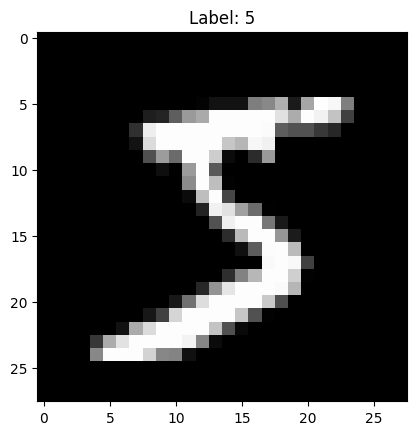

In [ ]:
# скачиваем MNIST
MNIST(root="data/", download=True)
mnist_dataset = MNIST(root="data/", train=True, transform=transforms.ToTensor())
print(mnist_dataset)

# выведем первое изображение
image, label = mnist_dataset[0]
plt.imshow(image.reshape(28, 28), cmap="gray")
plt.title(
    f"Label: {label}",
)

# будем использовать только часть данных
mnist_ratio = 0.05

# делим данные на test и train
train_mnsit_seq, test_mnsit_seq, _ = random_split(
    mnist_dataset,
    [0.95 * mnist_ratio, 0.05 * mnist_ratio, 1 - mnist_ratio],
    generator=torch.Generator().manual_seed(420),
)
print(f"{len(train_mnsit_seq)=}, {len(test_mnsit_seq)=}")

mnist_train_loader = DataLoader(train_mnsit_seq, 64, shuffle=True)
mnist_test_loader = DataLoader(test_mnsit_seq, 512, shuffle=False)

Создадим простую модель для экспериментов

In [ ]:
class MnistModel(nn.Module):
    def __init__(self, input_dim: int = 28 * 28, output_dim: int = 10):
        super().__init__()

        self.net = nn.Sequential(
            nn.Linear(input_dim, output_dim),
        )

    def forward(self, x):
        x = x.view(-1, 784)
        return self.net(x)

Полезные функции для тренировки и оценки на датасете MNIST

In [ ]:
def train_mnist(
    model: nn.Module, optimizer: torch.optim.Optimizer, **loss_kwargs
) -> None:
    loss_fn = nn.CrossEntropyLoss()
    model.train()
    for inputs, labels in mnist_train_loader:
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        output = model(inputs)
        loss = loss_fn(output, labels)
        loss.backward(**loss_kwargs)
        optimizer.step()


def eval_mnist(model: nn.Module) -> tuple[float, float]:
    loss_fn = nn.CrossEntropyLoss()
    correct = 0
    total = 0
    val_loss = 0.0
    with torch.no_grad():
        model.eval()
        for inputs, labels in mnist_test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            val_loss += loss_fn(outputs, labels).item()
    return val_loss, correct / total

## [CIFAR-10](https://paperswithcode.com/dataset/cifar-10)

Датасет понадобится для выполнения некоторых заданий Дня 4

100%|██████████| 170498071/170498071 [00:12<00:00, 13117434.34it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
len(cifar_train_dataset)=2500
len(cifar_test_dataset)=500


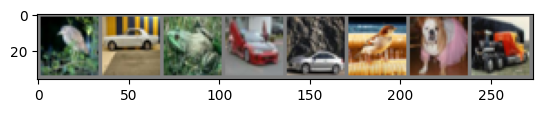

bird  car   frog  car   car   bird  dog   truck


In [ ]:
cifar_transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# загружаем датасет
cifar_train_dataset = torchvision.datasets.CIFAR10(
    root="./data", train=True, download=True, transform=cifar_transform
)
cifar_test_dataset = torchvision.datasets.CIFAR10(
    root="./data", train=False, download=True, transform=cifar_transform
)

# будем использовать только часть данных
cifar_ratio = 0.05

# делим данные train и test
cifar_train_dataset, _ = random_split(
    cifar_train_dataset,
    [cifar_ratio, 1 - cifar_ratio],
    generator=torch.Generator().manual_seed(420),
)
cifar_test_dataset, _ = random_split(
    cifar_test_dataset,
    [cifar_ratio, 1 - cifar_ratio],
    generator=torch.Generator().manual_seed(420),
)

print(f"{len(cifar_train_dataset)=}")
print(f"{len(cifar_test_dataset)=}")

assert len(cifar_train_dataset) == 2500
assert len(cifar_test_dataset) == 500

cifar_train_loader = torch.utils.data.DataLoader(
    cifar_test_dataset, batch_size=64, shuffle=True
)

cifar_test_loader = torch.utils.data.DataLoader(
    cifar_test_dataset, batch_size=256, shuffle=False
)

classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)


def imshow(image):
    image = image / 2 + 0.5  # де-нормализуем
    np_image = image.numpy()
    plt.imshow(np.transpose(np_image, (1, 2, 0)))
    plt.show()


# несколько случайных элементов
images, labels = next(iter(cifar_train_loader))
images, labels = images[:8], labels[:8]

# выведем изображения
imshow(torchvision.utils.make_grid(images))

# выведем метки
print(" ".join(f"{classes[labels[j]]:5s}" for j in range(8)))

In [ ]:
class CifarNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

Создадим сложную модель ([ResNet](https://arxiv.org/abs/1512.03385)) для экспериментов

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [
        nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
    ]
    if pool:
        layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)


class ResNet(nn.Module):
    def __init__(self, in_channels=3, num_classes=10):
        super().__init__()

        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))

        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))

        self.classifier = nn.Sequential(
            nn.MaxPool2d(4), nn.Flatten(), nn.Linear(512, num_classes)
        )

    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        return self.classifier(out)

In [ ]:
def train_cifar(
    model: nn.Module, optimizer: torch.optim.Optimizer, **loss_kwargs
) -> None:
    loss_fn = nn.CrossEntropyLoss()
    model.train()
    for inputs, labels in cifar_train_loader:
        inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        output = model(inputs)
        loss = loss_fn(output, labels)
        loss.backward(**loss_kwargs)
        optimizer.step()


def eval_cifar(model: nn.Module) -> tuple[float, float]:
    loss_fn = nn.CrossEntropyLoss()
    correct = 0
    total = 0
    val_loss = 0.0
    with torch.no_grad():
        model.eval()  # evaluation mode
        for inputs, labels in cifar_test_loader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)

            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            val_loss += loss_fn(outputs, labels).item()
    return val_loss, correct / total

# <a id='day1'></a> День 1 (10 + 38 баллов)

## Часть 1. Матрично-векторное дифференцирование (15 баллов)

### Задание 1 (6 баллов)

Вычислите градиенты $\nabla_A L, \nabla_b L$ функции ошибки $L$ для входных параметров $A,b$ соответсвенно. Градиент от параметра $x$ считается известным и равным $\nabla_x L$. Рекомендуется использовать алгоритм обратного распространения ошибки (backpropagation algorithm)

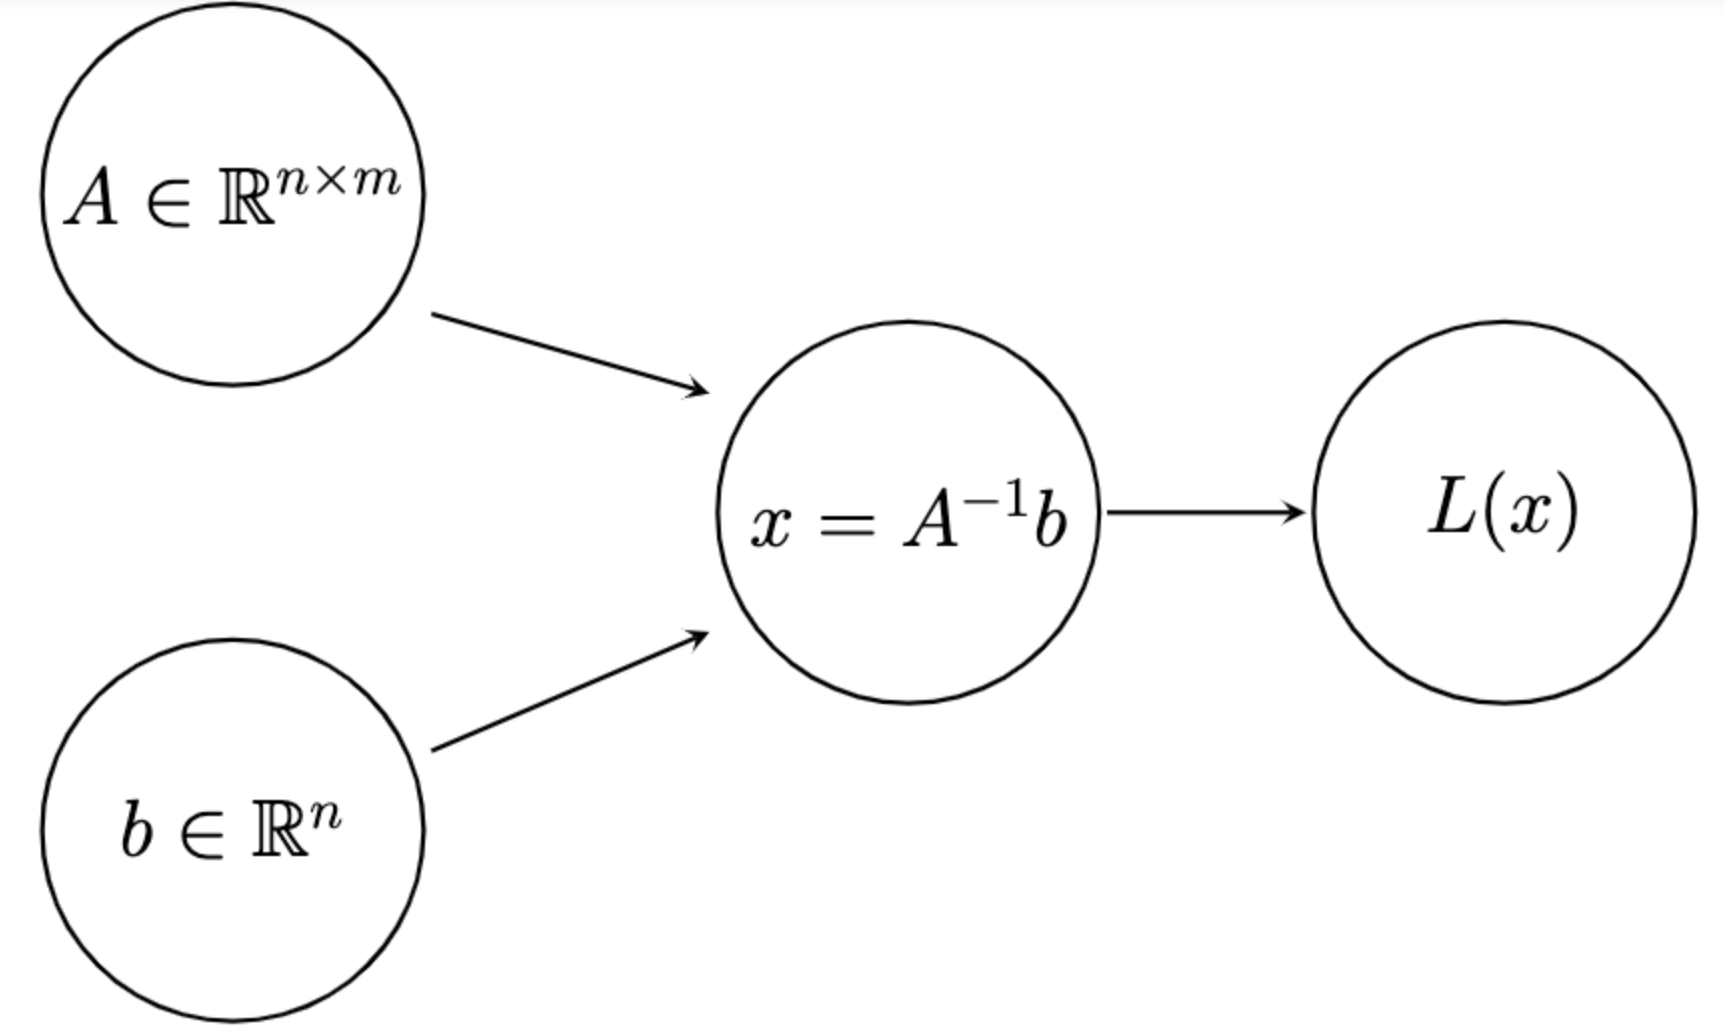


### Решение

$$
\frac {\partial L}{\partial x} = \nabla_x L \\
\frac {\partial L}{\partial A ^ {-1}} = \frac {\partial L}{\partial x} \cdot \frac {\partial x}{\partial A ^ {-1}} \\
\frac {\partial L}{\partial A} = \frac {\partial L}{\partial A ^ {-1}} \cdot \frac{\partial A ^ {-1}}{\partial A}= \frac {\partial L}{\partial x} \cdot \frac {\partial x}{\partial A ^ {-1}} \cdot \frac{\partial A ^ {-1}}{\partial A}
$$
Достаточно больно происходит на втором множителе, потому что нужно найти $\displaystyle \frac {\partial x}{\partial A ^ {-1}} $, а это по сути трехмерный объект размера $m \cdot n \cdot m$, так как мы наша функция переходит из пространства размерности $m \cdot n$ в пространство размерностью $m$. Соответственно, градиент этой функции по матрице $m \cdot n$ будет примерно так выглядеть:
$
\frac {\partial x}{\partial A ^ {-1}} = (\frac {\partial x_{i}}{\partial A ^ {-1}})_{i=1}^{m}
$ эта штука в целом представляет из себя m матриц, где каждая матрица состоит из $m - 1$ нулевых строк и одной строки $b$ в соответствии с индексом $i$ \\

На третьем множителе вообще кайф $\frac{\partial A ^ {-1}}{\partial A} = (\frac{\partial A^{-1}_{j, i}}{\partial A})_{j, i = 1}^{m, n}$

В итоге получается:
$$
\nabla_A L = \frac {\partial L}{\partial A} = \nabla_x L \ \cdot (\frac {\partial x_{i}}{\partial A ^ {-1}})_{i=1}^{m} \cdot (\frac{\partial A^{-1}_{j, i}}{\partial A})_{j, i = 1}^{m, n}
$$
С $b$ все гораздо легче будет:
$$
\frac {\partial L}{\partial b} = \frac {\partial L}{\partial x} \cdot \frac {\partial x}{\partial b} \\
\frac {\partial x}{\partial b} = \frac{\partial (A^{-1} \cdot b)}{\partial b} = \frac {A^{-1} \partial b}{\partial b} = A^{-1}
$$
Итого:
$$
\nabla_b L = \frac {\partial L}{\partial b} = \nabla_x L \ \cdot A^{-1}
$$


### Задание 2 (4 балла)

Вычислите производную первого порядка для следующей функции $f : \mathbb{R}^d \setminus \{ 0 \} \to \mathbb{R}$ такой, что $\displaystyle f(x) = \langle x, x \rangle^{\langle x, x \rangle}$

### Решение

$$\langle x, x \rangle^{\langle x, x \rangle} = e^{\langle x, x \rangle \ln\langle x, x \rangle }
\\
\mathrm{d} \ (e^{\langle x, x \rangle \ln\langle x, x \rangle }) = e^{\langle x, x \rangle \ln\langle x, x \rangle } \cdot \mathrm{d} ({\langle x, x \rangle \ln\langle x, x \rangle }) = e^{\langle x, x \rangle \ln\langle x, x \rangle } \cdot (\mathrm{d} (\langle x, x \rangle) \cdot \ln\langle x, x \rangle + \langle x, x \rangle \cdot \mathrm{d}(\ln\langle x, x \rangle)) = e^{\langle x, x \rangle \ln\langle x, x \rangle } \cdot (2x^T \mathrm{d} x \cdot \ln\langle x, x \rangle + \langle x, x \rangle \cdot \frac{\mathrm{d}(\langle x, x \rangle)}{\langle x, x \rangle}) = e^{\langle x, x \rangle \ln\langle x, x \rangle } \cdot (2x^T \cdot \ln\langle x, x \rangle \cdot \mathrm{d} x + 2x^T \cdot \mathrm{d} x) = \\
e^{\langle x, x \rangle \ln\langle x, x \rangle } \cdot (2x^T \cdot \ln\langle x, x \rangle + 2x^T) \mathrm{d} x = 2 e^{\langle x, x \rangle \ln\langle x, x \rangle } \cdot x^T \cdot (\ln\langle x, x \rangle + 1) \mathrm{d} x
$$

Мы нашли дифференциал, дальше чтобы найти производную нужно привести привести вектор-строку, умноженную на $dx$, в вектор-столбец:
$$
\nabla_x f = (2 e^{\langle x, x \rangle \ln\langle x, x \rangle } \cdot x^T \cdot (\ln\langle x, x \rangle + 1))^T = 2 e^{\langle x, x \rangle \ln\langle x, x \rangle } \cdot (\ln\langle x, x \rangle + 1) \cdot x
$$

### Задание 3* (5 баллов)

Вычислите производную **второго** порядка для функции из предыдущего задания $f : \mathbb{R}^d \setminus \{ 0 \} \to \mathbb{R}$ такой, что $\displaystyle f(x) = \langle x, x \rangle^{\langle x, x \rangle}$

### Решение

$d(2 e^{\langle x, x \rangle \ln\langle x, x \rangle } \cdot (\ln\langle x, x \rangle + 1) \cdot x) = d(2 e^{\langle x, x \rangle \ln\langle x, x \rangle }) \cdot (\ln\langle x, x \rangle + 1) \cdot x + 2 e^{\langle x, x \rangle \ln\langle x, x \rangle } \cdot d((\ln\langle x, x \rangle + 1) \cdot x) = 4 \cdot e^{\langle x, x \rangle \ln\langle x, x \rangle } \cdot (\ln\langle x, x \rangle + 1) \cdot x^T) \cdot dx\cdot (\ln\langle x, x \rangle + 1) \cdot x + 2 e^{\langle x, x \rangle \ln\langle x, x \rangle }(d(\ln\langle x, x \rangle + 1) \cdot x + (\ln\langle x, x \rangle + 1)\cdot dx) = 4 \cdot e^{\langle x, x \rangle \ln\langle x, x \rangle } \cdot (\ln\langle x, x \rangle + 1) \cdot x^T \cdot dx \cdot (\ln\langle x, x \rangle + 1) \cdot x + 2 e^{\langle x, x \rangle \ln\langle x, x \rangle }(\frac{1}{\langle x, x \rangle} + 2x^T)dx\cdot x + (\ln\langle x, x \rangle + 1)\cdot dx)$

## Часть 2*. Выпуклость (33 балла)

### Задание 1 (4 балла)

Проверьте, что множество $S = \{ x_1 \in \mathbb{R}, x_2 \in \mathbb{R} \mid x_1 > 0, x_2 > 0, x_1 x_2 \geq 1 \}$ является выпуклым

### Решение

In [ ]:
# ваше решение (markdown)

### Задание 2 (4 балла)

Проверьте, что множество $S = \{ x \in \mathbb{R}^d \mid x_1 \leq x_2 \leq \ldots \leq x_d \}$ является выпуклым


### Решение

In [ ]:
# ваше решение (markdown)

### Задание 3 (7 баллов)

Проверьте, что множество $S = \{ x \in \mathbb{R}^d \mid  \| x - a\|_2 \leq \| x - b\|_2 \}$, где $a\neq b \in \mathbb{R}^d$ and $\| \cdot \|_2$ - Евклидова норма ($\| x \|^2_2 = x^T x$), является выпуклым

### Решение

In [ ]:
# ваше решение (markdown)

### Задание 4 (4 балла)

**Подсказка:** Возможно в этом задании (и возможно не только в нём) вам понадобятся следующие факты:

- дифференцируемая функция является выпуклой тогда и только тогда, когда

  $$
  \nabla^2 f(x) \geq 0 \quad \text{(Гессиан положительно полуопределён)}.
  $$

- дифференцируемая функция является $\mu$-сильно выпуклой тогда и только тогда, когда
  $$
  \nabla^2 f(x) \geq \mu I.
  $$

Проверьте, что функция $f: \mathbb{R}^2 \to \mathbb{R}$ такая, что $f(x) = x_1^2 x_2^2$, является выпуклой

### Решение

In [ ]:
# ваше решение (markdown)

### Задание 5 (4 балла)

Проверьте, что функция $f: \mathbb{R}^d \to \mathbb{R}$ такая, что $f(x) = \ | x \|^p$, где $p > 0$, является выпуклой

### Решение

In [ ]:
# ваше решение (markdown)

### Задание 6 (6 баллов)

Проверьте, что функция $f: \mathbb{R}^d \to \mathbb{R}$ такая, что
$
f(x) =  \frac{1}{n} \sum\limits_{i=1}^n l (g(x, a_i), b_i),
$
где $g(x, a) = x^T a$, $l(z,b) = \ln (1 + \exp(-bz))$, $a_i \in \mathbb{R}^d$, $b_i \in \{-1, 1\}$, является выпуклой


**Подсказка:** Попробуйте представить изначальную функцию как сумму двух функций, в одной из которых $b_i=1$, а в другой $b_i=-1$

### Решение

In [ ]:
# ваше решение (markdown)

### Задание 7 (4 балла)

Докажите, что для всех $p, q \in \{ x \in \mathbb{R}^d \mid x_i \geq 0, \sum\limits_{i=1}^d x_i = 1\}$ справедливо следующее утверждение

$$
\sum_{i=1}^d \ln\left( \frac{p_i}{q_i}\right) p_i \geq 0.
$$


### Решение

In [ ]:
# ваше решение (markdown)

# <a id='day2'></a> День 2 (45 + 19 баллов)

## Часть 1. Задача безусловной оптимизации (33 + 8 баллов)

Рассмотрим проблему минимизации эмпирического риска (empirical risk minimization, ERM)
$$
\begin{equation}
\min_{w \in \mathbb{R}^d} \frac{1}{n} \sum\limits_{i=1}^n \ell (g(w, x_i), y_i) + \frac{\lambda}{2} \| w \|^2_2,
\end{equation}
$$
где $\ell$ - функция ошибки, $g$ - модель, $w$ - параметры модели, $\{x_i, y_i\}_{i=1}^n$ набор данных состоящий из признаков $x_i$ и значений $y_i$, $\lambda > 0$ - параметр регуляризации

Будем использовать линейную модель $g(w, x) = w^T x$ и логистическую (сигмоидальную) функцию ошибки: $\ell(z,y) = \ln (1 + \exp(-yz))$ (**Важно: $y$ должны принимать значения -1 или +1**). Получившуюся задачу обычно называют задачей логистической регрессией

### Задание 1 (9 баллов)

В этом задании вам нужно:

- Вычислить градиент и Гессиан для данной задачи
- Доказать, что задача является $\mu$-сильно выпуклой и имеет $L$-Липшецевый градиент с $\mu = \lambda$ и $L = \lambda + \frac{1}{4n} \sum_{i=1}^n \| x_i\|^2_2$

### Решение

\begin{equation}
\mathrm{d}(\frac{1}{n} \sum\limits_{i=1}^n \ln (1 + \exp(-y_i\cdot (w^T x_i))) + \frac{\lambda}{2} \| w \|^2_2) = \frac{1}{n} \sum\limits_{i=1}^n \mathrm{d} (\ln (1 + \exp(-y_i\cdot (w^T x_i))) + \frac{\lambda}{2} \| w \|^2_2) = \\
\frac{1}{n} \sum\limits_{i=1}^n \mathrm{d} (\ln (1 + \exp(-y_i\cdot (w^T x_i)))) + \mathrm{d} (\frac{\lambda}{2} \| w \|^2_2) = \frac{1}{n} \sum\limits_{i=1}^n \frac{\mathrm{d} (1 + \exp(-y_i\cdot (w^T x_i)))}{1 + \exp(-y_i\cdot (w^T x_i))} + \lambda \cdot w^T \mathrm{d} w = \frac{1}{n} \sum\limits_{i=1}^n \frac{\exp(-y_i\cdot (w^T x_i)) \mathrm{d} (-y_i\cdot (w^T x_i))}{1 + \exp(-y_i\cdot (w^T x_i))} + \lambda \cdot w^T \mathrm{d} w = \frac{1}{n} \sum\limits_{i=1}^n (-y_i) \cdot \frac{\exp(-y_i\cdot (w^T x_i)) \cdot  x_i^T \cdot \mathrm{d} w}{1 + \exp(-y_i\cdot (w^T x_i))} + \lambda \cdot w^T \mathrm{d} w = \\ \frac{1}{n} \sum\limits_{i=1}^n ((-y_i) \cdot \frac{\exp(-y_i\cdot (w^T x_i)) \cdot  x_i^T}{1 + \exp(-y_i\cdot (w^T x_i))} + \lambda \cdot w^T ) \cdot \mathrm{d} w =
\end{equation}
Дальше упрощу немного - домножу числитель и знаменатель на $\exp(y_i\cdot (w^T x_i))$ так будет легче считать Гессиан
$$
= \frac{1}{n} \sum\limits_{i=1}^n ((-y_i) \cdot \frac{\exp(-y_i\cdot (w^T x_i)) \cdot  x_i^T \cdot \exp(y_i\cdot (w^T x_i))}{\exp(y_i\cdot (w^T x_i)) \cdot (1 + \exp(-y_i\cdot (w^T x_i)))} + \lambda \cdot w^T ) \cdot \mathrm{d} w = \\ \frac{1}{n} \sum\limits_{i=1}^n ((-y_i) \cdot \frac{x_i^T}{1 + \exp(y_i\cdot (w^T x_i))} + \lambda \cdot w^T ) \cdot \mathrm{d} w
$$
Получаем, что
$$
\nabla_w \ell = (\frac{1}{n} \sum\limits_{i=1}^n ((-y_i) \cdot \frac{x_i^T}{1 + \exp(y_i\cdot (w^T x_i))} + \lambda \cdot w^T ))^T = \frac{1}{n} \sum\limits_{i=1}^n ((-y_i) \cdot \frac{x_i}{1 + \exp(y_i\cdot (w^T \cdot x_i))} + \lambda \cdot w )
$$

Теперь Гессиан, нам нужно взять дифференциал от первой производной:

$$
\mathrm{d} (\frac{1}{n} \sum\limits_{i=1}^n ((-y_i) \cdot \frac{x_i}{1 + \exp(y_i\cdot (w^T \cdot x_i))} + \lambda \cdot w )) = \frac{1}{n} \sum\limits_{i=1}^n ((-y_i) \cdot x_i \cdot \mathrm{d} (\frac{1}{1 + \exp(y_i\cdot (w^T \cdot x_i))}) + \lambda \cdot I \cdot \mathrm{d} w ) = \\ \frac{1}{n} \sum\limits_{i=1}^n ((-y_i) \cdot x_i \cdot  -(\frac{\exp(y_i\cdot (w^T \cdot x_i)) \cdot y_i \cdot \mathrm{d} w^T \cdot x_i}{(1 + \exp(y_i\cdot (w^T \cdot x_i)))^2}) + \lambda \cdot I \cdot \mathrm{d} w ) = \\ \frac{1}{n} \sum\limits_{i=1}^n (y_i^2 \cdot \exp(y_i\cdot (w^T \cdot x_i)) \frac{x_i \cdot \mathrm{d} w^T \cdot x_i}{(1 + \exp(y_i\cdot (w^T \cdot x_i)))^2} + \lambda \cdot I \cdot \mathrm{d} w) = \\ \frac{1}{n} \sum\limits_{i=1}^n (y_i^2 \cdot \exp(y_i\cdot (w^T \cdot x_i)) \frac{x_i \cdot x_i^T \cdot \mathrm{d} w}{(1 + \exp(y_i\cdot (w^T \cdot x_i)))^2} + \lambda \cdot I \cdot \mathrm{d} w) = \\ \frac{1}{n} \sum\limits_{i=1}^n (y_i^2 \cdot \exp(y_i\cdot (w^T \cdot x_i)) \frac{x_i \cdot x_i^T}{(1 + \exp(y_i\cdot (w^T \cdot x_i)))^2} + \lambda \cdot I) \cdot \mathrm{d} w
$$
По поводу транспонирования и приведения к каноническому виду можем не париться, потому что Гессиан симметричен. Получаем итоговый ответ:

$$
H = \frac{1}{n} \sum\limits_{i=1}^n (\exp(y_i\cdot (w^T \cdot x_i)) \frac{x_i \cdot x_i^T}{(1 + \exp(y_i\cdot (w^T \cdot x_i)))^2}) + \lambda \cdot I
$$


По критерию о сильной выпуклости и об L-гладкости:
$$
\mu \cdot I \preceq H \preceq L\cdot I
$$

Сначала докажем сильную выпуклость:
$$
\mu \cdot I \preceq H \Rightarrow  0 \preceq H - \mu \cdot I \Rightarrow 0 \preceq \frac{1}{n} \sum\limits_{i=1}^n (\exp(y_i\cdot (w^T \cdot x_i)) \frac{x_i \cdot x_i^T}{(1 + \exp(y_i\cdot (w^T \cdot x_i)))^2}) + \lambda \cdot I - \lambda \cdot I = \\ \frac{1}{n} \sum\limits_{i=1}^n (\exp(y_i\cdot (w^T \cdot x_i)) \frac{x_i \cdot x_i^T}{(1 + \exp(y_i\cdot (w^T \cdot x_i)))^2})
$$

Ну и это условие выполняется, так как $0 \preceq x_i \cdot x_i^T$ это несложно доказывается по определению положительно полуопределенной матрицы $a^T x_i x_i^T a = (x_i^T a) ^ T  x_i^T a = \langle x_i^T a, x_i^T a\rangle \geq  0 $ так как это скалярное произведение векторов.
Соответственно в остальном эта матрица взаимодействует с неотрицательными числами (экспонента в степени или квадрат в знаменателе)

Теперь L-гладкость:
$$
H - L\cdot I\preceq 0 \Rightarrow \frac{1}{n} \sum\limits_{i=1}^n (\exp(y_i\cdot (w^T \cdot x_i)) \frac{x_i \cdot x_i^T}{(1 + \exp(y_i\cdot (w^T \cdot x_i)))^2}) + \lambda \cdot I - \lambda \cdot I - \frac{1}{4n} \sum_{i=1}^n \| x_i\|^2_2 \cdot I = \\ \frac{1}{n} \sum\limits_{i=1}^n (\exp(y_i\cdot (w^T \cdot x_i)) \frac{x_i \cdot x_i^T}{(1 + \exp(y_i\cdot (w^T \cdot x_i)))^2}) - \frac{1}{4n} \sum_{i=1}^n \| x_i\|^2_2 \cdot I
$$

Экспоненты в первой части выражения нужно причесать и избавиться от них - это несовсем своевременная операция и ее нужно будет применять позже с точки зрения строгости доказательства, однако я заранее проверил, что своевременность никак не повлияет на результат, поэтому сделаю это сейчас: $\exp(y_i\cdot (w^T \cdot x_i)) = a \Rightarrow \frac{\exp(y_i\cdot (w^T \cdot x_i))}{(1 + \exp(y_i\cdot (w^T \cdot x_i)))^2} = \frac{a}{(1 + a)^2} = \frac{a}{1 + 2a + a^2} = \frac{1}{1 / a + 2 + a} \leq \frac {1}{4}$

Теперь можно работать непосредственно с матрицей и доказывать ее отрицательную определенность
$$
\frac{1}{n} \sum\limits_{i=1}^n (\exp(y_i\cdot (w^T \cdot x_i)) \frac{x_i \cdot x_i^T}{(1 + \exp(y_i\cdot (w^T \cdot x_i)))^2}) - \frac{1}{4n} \sum_{i=1}^n \| x_i\|^2_2 \cdot I \leq \\
\leq \frac{1}{4n}\sum\limits_{i=1}^n (x_i \cdot x_i^T -  \| x_i\|^2_2 \cdot I)
$$

Осталось доказать неположительную определенность для получившейся матрицы:
$$
∀ \ y,  y^T \cdot (x \cdot x^T - x^T \cdot x \cdot I) \cdot y \leq 0
$$

$ y^T \cdot (x \cdot x^T - x^T \cdot x \cdot I) \cdot y = y^T x x^T y - y^T x^T x  y = \langle x^Ty, x^Ty ⟩ - ||x||_2^2 \cdot ||y||_2^2 = \\ = (x_1 y_1 + x_2y_2 + ... + x_dy_d) \cdot (x_1 y_1 + x_2y_2 + ... + x_dy_d) - (x_1^2 + x_2^2 + ... + x_d^2) \cdot (y_1^2 + y_2^2 + ... + y_d^2) \leq 0$


Последнее выполняется по КБШ, ура, мы доказали!

### Задание 2 (4 балла)

К ноутбуку прилагается датасет *mushrooms.txt*. Так же его можно скачать по [ссылке](https://drive.google.com/file/d/1lgwawQxGD_6XruWbquMH6W2yKPVQ5kdi/view?usp=sharing)

In [ ]:
# файл должен лежать в той же директории, что и ноутбук
dataset = "mushrooms.txt"

data = load_svmlight_file(dataset)
mushrooms_x, mushrooms_y = data[0].toarray(), data[1]

# сделаем y -1 или 1
mushrooms_y = 2 * mushrooms_y - 3

train_mush_x, test_mush_x, train_mush_y, test_mush_y = train_test_split(
    mushrooms_x, mushrooms_y, test_size=0.2, random_state=42
)

print(f"{train_mush_x.shape=}")
print(f"{train_mush_y.shape=}")

train_mush = list(zip(train_mush_x, train_mush_y))
test_mush = list(zip(test_mush_x, test_mush_y))

print(f"{len(train_mush)=}")
print(f"{len(test_mush)=}")

assert len(train_mush) == 6499
assert len(test_mush) == 1625

train_mush_x.shape=(6499, 112)
train_mush_y.shape=(6499,)
len(train_mush)=6499
len(test_mush)=1625


В этом задании вам нужно:
- Для тренировочной части `train_mush` оценить константу $L =  \frac{1}{4n} \sum\limits_{i=1}^n \| x_{i} \|^2_2 + \lambda$.
Возьмите $\lambda \approx L / 1000$
- Написать функцию для вычисления значения $f(w)$, градиента $\nabla f(w)$ и гессиана $\nabla^2 f(w)$. Функции должны принимать также параметры $x$ и $y$ (`train_mush_x`, `train_mush_y`)
- Проверить правильность функции для вычисления $f(w)$, используя функцию `assert_mush()`. Если проверка не проведена или провалена, **задание автоматически считается невыполненным**
- Написать функцию `mush_accuracy()`, которая бы считала точность предсказаний на тестовых данных `test_mush`

In [ ]:
def assert_mush(mush_f: Callable, mush_grad: Callable, mush_hess: Callable):
    w = np.zeros(train_mush_x[0].shape[0])
    assert mush_f(w) == 0.6931471805599453
    assert mush_grad(w).sum() == -0.3732112632712724
    assert mush_hess(w).sum() == 110.83858858858859

### Решение

Ну сначала оценю $L$:
$$L =  \frac{1}{4n} \sum\limits_{i=1}^n \| x_{i} \|^2_2 + \lambda = \frac{1}{4n} \sum\limits_{i=1}^n \| x_{i} \|^2_2 + L/1000 \\ \frac{999}{1000}L = \frac{1}{4n} \sum\limits_{i=1}^n \| x_{i} \|^2_2 \\ L = \frac{1000}{4 \cdot 999 \cdot n} \sum\limits_{i=1}^n \| x_{i} \|^2_2 \\ \lambda = \frac{1}{4 \cdot 999 \cdot n} \sum\limits_{i=1}^n \| x_{i} \|^2_2$$

In [ ]:
def mush_f(w, train_mush_x = train_mush_x, train_mush_y = train_mush_y):
  lambd = (train_mush_x ** 2).sum() / (4 * 999 * train_mush_x.shape[0])
  a_x = train_mush_x @ w

  return np.log(1 + np.exp(-train_mush_y * a_x)).sum() / train_mush_x.shape[0] + lambd / 2 * w @ w

In [ ]:
def mush_grad(w, train_mush_x = train_mush_x, train_mush_y = train_mush_y):
  lambd = (train_mush_x ** 2).sum() / (4 * 999 * train_mush_x.shape[0])
  a_x = train_mush_x @ w

  return (-train_mush_y.reshape(-1, 1) * train_mush_x / (1 + np.exp(train_mush_y * a_x).reshape(-1, 1))).sum(axis=0) / train_mush_x.shape[0] + lambd * w

In [ ]:
def mush_hess(w, train_mush_x = train_mush_x, train_mush_y = train_mush_y):
  lambd = (train_mush_x ** 2).sum() / (4 * 999 * train_mush_x.shape[0])

  # тут уже матричная штука, я лучше циклом сделаю
  H = np.zeros((train_mush_x.shape[1], train_mush_x.shape[1]))
  for sample in train_mush_x:
    exp = np.exp(1 * (w @ sample))
    mat = np.tile(sample, (sample.shape[0], 1))

    H += exp * (mat * mat.T) / (exp + 1) ** 2
  return H / train_mush_x.shape[0] + lambd * np.eye(train_mush_x.shape[1])

In [ ]:
def mush_accuracy(w, test_mush):
  acc = 0
  for sample in test_mush:
    acc += np.sign(w @ sample[0]) == sample[1]

  return acc / len(test_mush)

Проверка

In [ ]:
assert_mush(mush_f, mush_grad, mush_hess)

### Задание 3 (5 баллов)

Рассмотрим метод градиентного спуска (Gradient Descent)

$$
\begin{equation*}
x_{k+1} = x_k - \gamma_k \nabla f(x_k)
\end{equation*}
$$

В этом задании вам нужно:
- Дописать функцию `check_approx_mush`, которая будет использоваться для тестирования алгоритмов на датасете mushrooms. В качестве критерия сходимости рекомендуется использовать норму градиента, но вы можете использовать любой другой критерий
- Реализовать градиентный спуск как класс, унаследованный от `ManualSolver` (определён ниже)
- Запустить градиентный спуск на датасете mushrooms на 500 эпохах и $\gamma_k=0.001$
- Построить следующие графики (можете использовать для этого функцию `draw_plots()`):
  - Критерий / Эпоха
  - Критерий / Эпоха (логарифмическая шкала)

### Решение

In [ ]:
w_mush_shape = train_mush_x.shape[1]
np.random.seed(420)
start_w_mush = np.random.randn(w_mush_shape)  # начальная точка для всех экспериментов

In [ ]:
class BaseSolver:
    def step(self, w: np.ndarray, k: int) -> np.ndarray:
        # эту функцию должны переопределить наследуемые классы
        raise NotImplementedError


class ManualSolver(BaseSolver):
    def __init__(
        self,
        lr: float | Callable,
        grad_f: Callable = mush_grad,
        hess_f: Callable = mush_hess,
    ) -> None:
        self.grad_f = grad_f
        self.hess_f = hess_f
        self.lr = lr # if isinstance(lr, Callable) else lambda _: lr

In [ ]:
class GD(ManualSolver):
  def __init__(self, lr, grad_f, hess_f):
        super().__init__(lr, grad_f, hess_f)
  def step(self, w: np.ndarray, k: int):
    grad = self.grad_f(w, train_mush_x, train_mush_y)

    return w - self.lr * grad

In [ ]:
def check_approx_mush(
    approximations: list[tuple[str, BaseSolver]],
    epochs: int = 500,
    start_w: np.ndarray = start_w_mush,
    stop_criterion: float = 1e-5,
) -> dict:
    results_dict = {}

    for name, approx in approximations:
        accuracies = []
        criterion_logs = []  # нормы градиента или что-то другое
        time_logs = []

        np.random.seed(420)
        w = start_w.copy()

        # initial eval
        ... #TODO

        # log
        accuracies.append(mush_accuracy(w, test_mush))
        criterion_logs.append(np.sqrt((approx.grad_f(w, train_mush_x, train_mush_y) ** 2).sum()))

        start_time = time.time()

        time_logs.append(time.time() - start_time)

        with tqdm(range(epochs), desc=name) as loop:
            for k in loop:
                # train
                w = approx.step(w, k)

                # eval
                # Остановить, если результат функции не определён
                if np.isnan(mush_f(w, train_mush_x, train_mush_y)) or np.isinf(mush_f(w, train_mush_x, train_mush_y)):
                    break
                loss = mush_f(w, train_mush_x, train_mush_y)
                grad_norm = np.sqrt((approx.grad_f(w, train_mush_x, train_mush_y) ** 2).sum())
                # log
                acc = mush_accuracy(w, test_mush)
                accuracies.append(acc)
                criterion_logs.append(grad_norm)

                time_logs.append(time.time() - start_time)
                loop.set_postfix({"Loss": loss, "Accuracy": acc, "Grad norm": grad_norm})

                # Остановить, если criterion <= stop_criterion
                if grad_norm <= stop_criterion:
                  break

        results_dict[name] = {
            "Epoch": list(range(len(accuracies))),
            "Time": time_logs,
            "Accuracy": accuracies,
            "Criterion": criterion_logs,
            "W": w.copy(),
        }

    return results_dict

In [ ]:
solver = ('GD with step = 0.001', GD(0.001, mush_grad, mush_hess))
res = check_approx_mush([solver])

GD with step = 0.001: 100%|██████████| 500/500 [00:26<00:00, 18.57it/s, Loss=1.21, Accuracy=0.668, Grad norm=0.93]


In [ ]:
plots = [
  ({"name": "Эпоха", "ref": "Epoch", "log": True}, {"name": "Критерий", "ref": "Criterion"}),
  # ({"name": "Epoch"}, {"name": "Criterion"}),
  ({"name": "Время", "ref": "Time", "log": True}, {"name": "Критерий", "ref": "Criterion"}),
  ({"name": "Эпоха", "ref": "Epoch"}, {"name": "Точность", "ref": "Accuracy"}),
  ({"name": "Время", "ref": "Time"}, {"name": "Точность", "ref": "Accuracy"}),
]

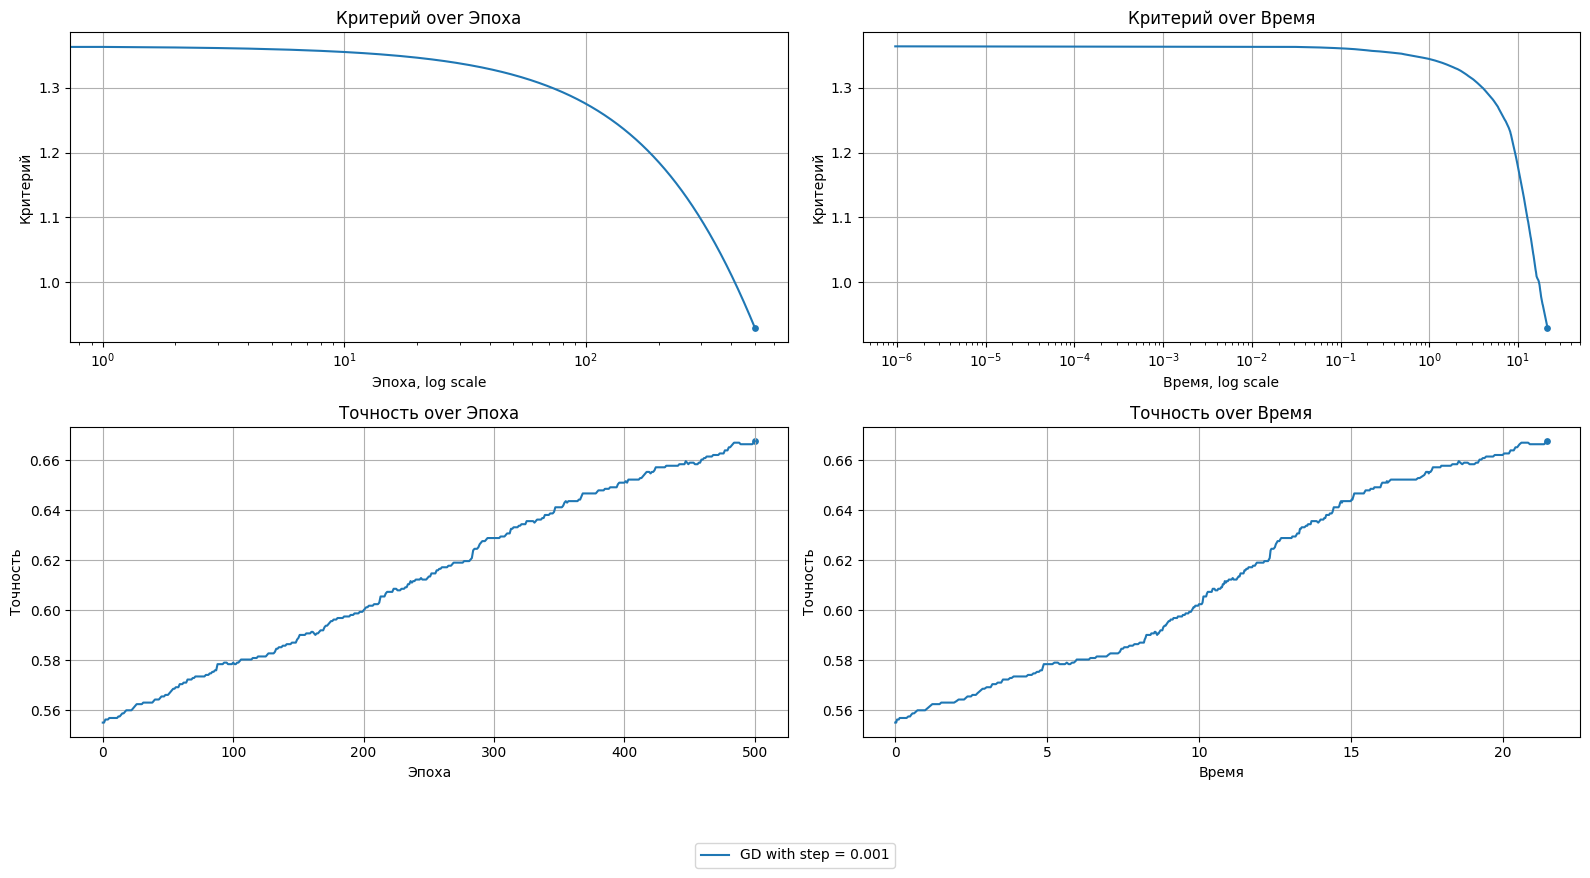

In [ ]:
draw_plots(res, plots=plots)

### Задание 4 (3 балла)

В этом задании вам нужно:
- Протестировать градиентный спуск с шагом $\gamma_k = \frac{1}{L}$ на 500 эпохах
- Протестировать градиентный спуск с разными, но константными шагами $\gamma_k = \gamma$ на 1000 эпохах (не менее четырёх экспериментов). Попробуйте $\gamma$ из диапазона от $0$ до $3/L$
- Построить следующие графики (в дальнейших заданиях нужно использовать такой же набор графиков):
  - Критерий / Эпоха (логарифмическая шкала)
  - Критерий / Время (логарифмическая шкала)
  - Точность (Accuracy) / Эпоха
  - Точность (Accuracy) / Время

- Определить, какой шаг оказался "лучшим". Не забудьте пояснить, по каким критериям определяли "лучший"
- Сделайте выводы

### Решение

In [ ]:
L = 1000 * (train_mush_x ** 2).sum() / (4 * 999 * train_mush_x.shape[0])
res_1 = check_approx_mush([('GD with step = 1 / L', GD(1 / L, mush_grad, mush_hess))])

GD with step = 1 / L: 100%|██████████| 500/500 [00:26<00:00, 18.54it/s, Loss=0.195, Accuracy=0.977, Grad norm=0.0336]


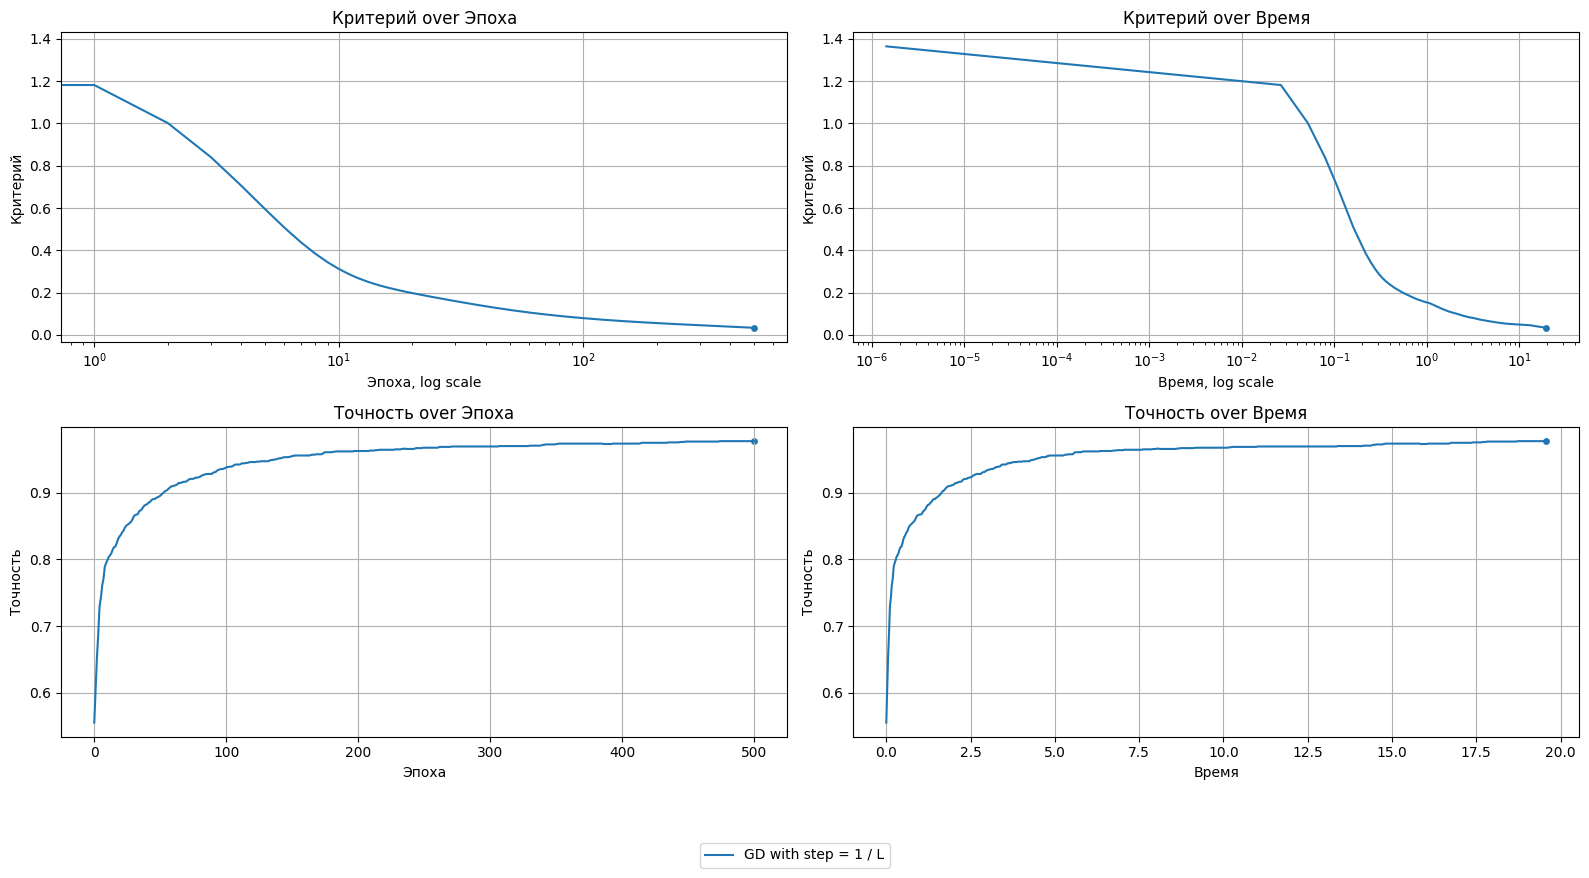

In [ ]:
draw_plots(res_1, plots=plots)

In [ ]:
steps = np.linspace(0.0001, 3 / L, 4)
gds = []
for step in steps:
  gds.append((f'GD with step = {step}', GD(step, mush_grad, mush_hess)))

res_2 = check_approx_mush(gds, 1000)

GD with step = 0.5708571428571428: 100%|██████████| 1000/1000 [00:36<00:00, 27.23it/s, Loss=0.113, Accuracy=0.989, Grad norm=0.00183]


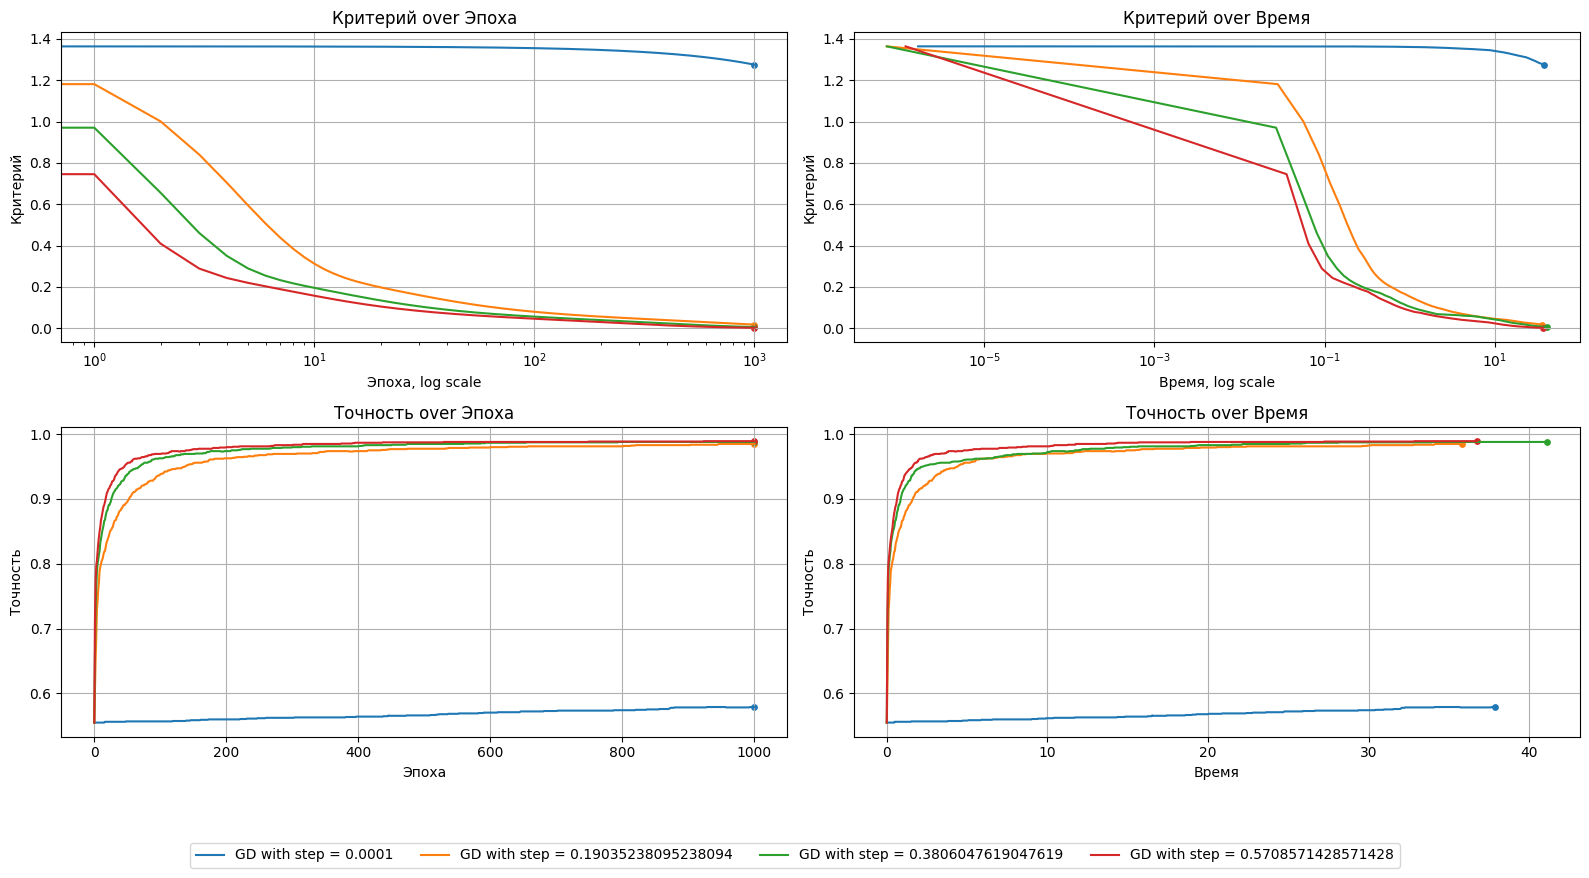

In [ ]:
draw_plots(res_2, plots=plots)

In [ ]:
1 / L # это просто чтобы не забывать значение

0.19028571428571428

Конкретно в моем эксперименте (со взятыми значениями равномерно из указанного диапозона) можно сказать следующее:

**Выводы**
- Худше всего показал себя градиент с наименьшим шагом - показывает плохой результат по точности, а также по норме градиента
- Быстрее всего по сходимости показал себя градиент с наибольшим шагом
- Градиент с оптимальным шагом 1 / L сходится медленнее, однако этот показатель на тестовой выборке, скорее всего данные хорошо подобраны, что можно с достаточно широким диапазоном шага дойти до оптимума.

### Задание 5* (3 балла)

Теперь рассмотрим другие техники выбора шага, а не только константные

В этом задании вам нужно:
- Протестировать градиентный спуск с шагом $\gamma_k = \frac{\gamma}{\delta + k}$, где  $\gamma$ и $\delta$ должны быть подобраны по-отдельности. Какая конфигурация показывает лучшие результаты?
- Протестировать градиентный спуск с шагом $\gamma_k = \frac{\gamma}{\delta + \sqrt{k}}$, где  $\gamma$ и $\delta$ должны быть подобраны по-отдельности. Какая конфигурация показывает лучшие результаты?
- Построить сравнительные графики на датасете mushrooms для предложенных подходов (в том числе из предыдущих заданий)
- Сделайте выводы


### Решение

In [ ]:
# ваше решение (code + markdown)

**Выводы**

...


### Задание 6 (5 баллов)

Рассмотрим так называемый Метод тяжёлого шарика (Heavy Ball)

$$
\begin{align*}
& x_{k+1} = x_k - \gamma_k \sum_{i\in \mathcal{X}} \nabla f_i(x_k) + \beta_k (x_k - x_{k-1})
\end{align*}
$$

Или, как обычно записывают на практике:

$$
\begin{align*}
& h_k = \beta_k h_{k-1} - \gamma_k \sum_{i\in \mathcal{X}} \nabla f_i(x_k) \\
& x_{k+1} = x_k + h_k
\end{align*}
$$

Метод как бы предполагает наличие у текущей точки есть инерция, как у "тяжелого" материального шарика движущегося по наклонной поверхности.


В этом задании вам нужно:
- Реализовать метод тяжёлого шарика как класс, унаследованный от `BaseSolver`. Обратите внимание, что в методе есть дополнительный гиперпараметр $\beta_k$
- Запустить метод тяжёлого шарика на датасете mushrooms на 500 эпохах и подберите лучший набор гиперпарамеров ($\gamma_k$ и $\beta_k$), как выше с градиентным спуском
- Построить графики, как в предыдущем задании
- Сделать выводы. В том числе опишите, на что влияет изменение $\beta_k$

### Решение

In [ ]:
class HBall(ManualSolver):
  def __init__(self, lr, grad_f, hess_f, beta):
        super().__init__(lr, grad_f, hess_f)
        self.beta = beta
        self.h = 0
  def step(self, w: np.ndarray, k: int):
    grad = self.grad_f(w, train_mush_x, train_mush_y)
    w_new = w + self.beta * self.h - self.lr * grad
    self.h = self.beta * self.h - self.lr * grad

    return w_new

HBall with step = 0.19028571428571428, beta = 0.1: 100%|██████████| 500/500 [00:28<00:00, 17.81it/s, Loss=0.184, Accuracy=0.978, Grad norm=0.0311]
HBall with step = 0.19028571428571428, beta = 0.25: 100%|██████████| 500/500 [00:30<00:00, 16.54it/s, Loss=0.167, Accuracy=0.981, Grad norm=0.0267]
HBall with step = 0.19028571428571428, beta = 0.4: 100%|██████████| 500/500 [00:27<00:00, 17.95it/s, Loss=0.149, Accuracy=0.983, Grad norm=0.0214]
HBall with step = 0.6708571428571428, beta = 0.1: 100%|██████████| 500/500 [00:28<00:00, 17.77it/s, Loss=0.115, Accuracy=0.988, Grad norm=0.00563]
HBall with step = 0.6708571428571428, beta = 0.25: 100%|██████████| 500/500 [00:25<00:00, 19.55it/s, Loss=0.114, Accuracy=0.988, Grad norm=0.00365]
HBall with step = 0.6708571428571428, beta = 0.4: 100%|██████████| 500/500 [00:22<00:00, 22.69it/s, Loss=0.113, Accuracy=0.989, Grad norm=0.00193]


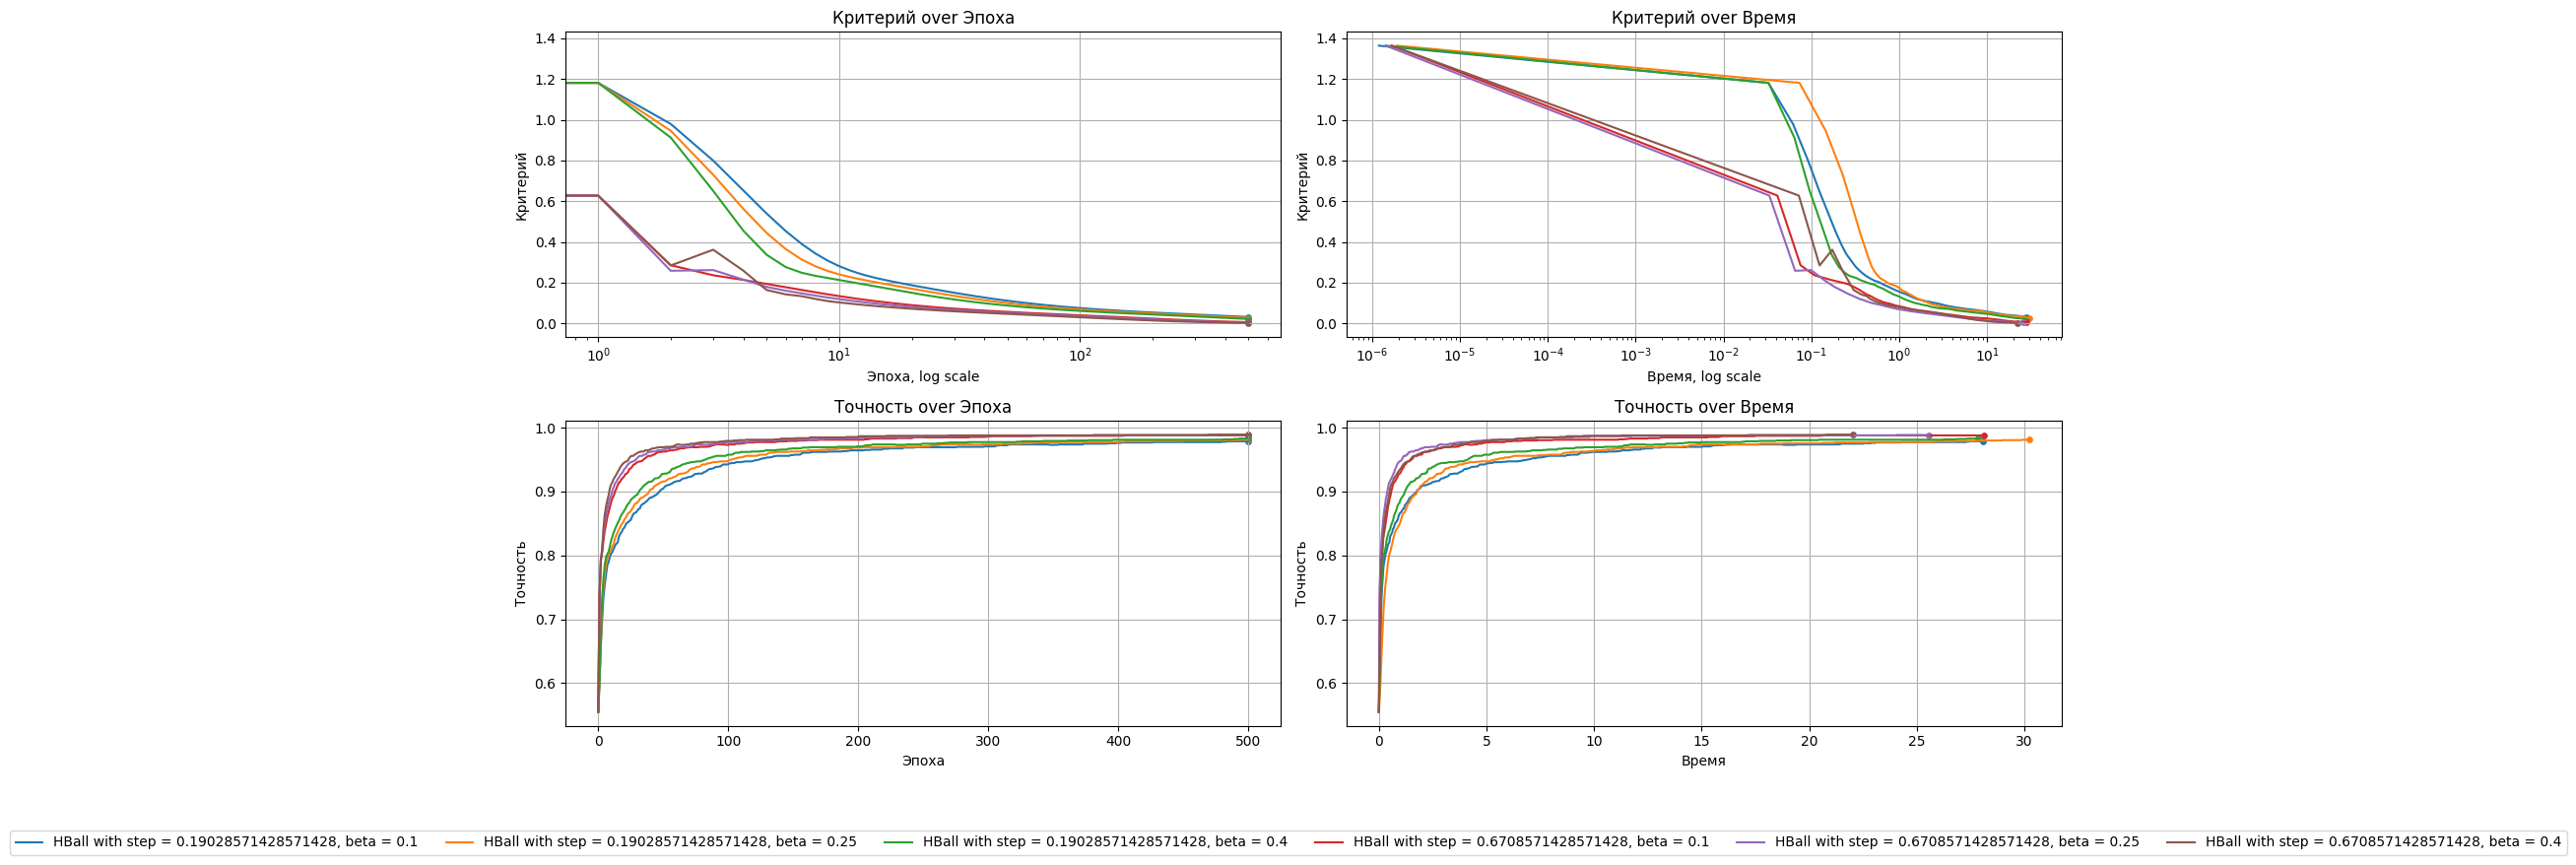

In [ ]:
steps = np.linspace(1 / L, 3 / L + 0.1, 2)
betas = np.linspace(0.1, 0.4, 3)
hbs = []
for step in steps:
  for beta in betas:
    hbs.append((f'HBall with step = {step}, beta = {beta}', HBall(step, mush_grad, mush_hess, beta)))

res_3 = check_approx_mush(hbs)
draw_plots(res_3, plots=plots)

Естественно я не отображал весь перебор, отрисовал на графиках только те кейсы, в которых гиперпараметры оптимальны по моим экспериментам, а также по которым можно судить влияние этих гиперпараметров.

**Выводы**
- $\beta$ влияет на как минимум на скорость сходимости, это видно по правому нижнему графику, с бОльшим $\beta$ веса быстрее сходятся к оптимуму
- помимо $\beta$ конечно все также более сильное влиение оказывает шаг - на всех рисунках можно разделить на два вида графики по размеру шага
- в целом видна инерция от шарика - чем больше $\beta$ - тем ближе наши графики к оптимуму - они как будто сдвигаются параллельно.

### Задание 7* (5 баллов)

Рассмотрим ещё один ускоренный метод - Ускоренный градиентный метод Нестерова (Nesterov Momentum)

$$
\begin{align*}
& x_{k+1} = y_k - \gamma_k \sum_{i\in \mathcal{X}} \nabla f_i(y_k) \\
& y_{k+1} = x_{k+1} + \beta_k (x_{k+1} - x_k)
\end{align*}
$$

Или, как обычно записывают на практике:

$$
\begin{align*}
& h_k = \beta_k h_{k-1} - \gamma_k \sum_{i\in \mathcal{X}} \nabla f_i(x_k + \beta_k  h_{k-1})\\
& x_{k+1} = x_k + h_k
\end{align*}
$$

Ключевое отличие метода Нестерова от метода тяжёлого шарика в том, что благодаря импульсу в точку подсчёта градиента, происходит экстраполяция, или "взгляд в будущее"


В этом задании вам нужно:
- Реализовать метод Нестерова как класс, унаследованный от `BaseSolver`
- Запустить метод Нестерова на датасете mushrooms на 500 эпохах и подберите лучший набор гиперпарамеров ($\gamma_k$ и $\beta_k$), как в предыдущих заданиях
- Построить графики, как в предыдущих заданиях
- Сделать выводы. В том числе опишите, на что влияет изменение $\beta_k$

### Решение

**Выводы**
- ...

### Задание 8 (5 баллов)

Три предыдущих метода (градиентный спуск, метод тяжёлого шарика и метод Нестерова) относятся к методам первого порядка, так как использует для обновления только градиент целевой функции

Рассмотрим один из самых известных методов второго порядка - Метод Ньютона (Newton's method):

$$
x_{k+1} = x_k - \nabla^2f(x_k)^{-1} \nabla f(x_k)
$$

А точнее, его модификацию - демпфированный метод Ньютона (Dumped Newton's method):

$$
x_{k+1} = x_k - \gamma_k \nabla^2f(x_k)^{-1} \nabla f(x_k)
$$

Как видно из описания метода, для обновления параметров используется обратный гессиан

В этом задании вам нужно:
- Реализовать демпфированный метод Ньютона как класс, унаследованный от `BaseSolver`
- Запустить демпфированный метод Ньютонана датасете mushrooms на 500 эпохах и подберите лучший шаг ($\gamma_k$), как в предыдущих заданиях. Обязательно попробуйте $\gamma_k = 1$, что соответствует оригинальному методу Ньютона
- Построить графики, как в предыдущих заданиях
- Зафиксировать $\gamma_k = 1$ и попробовать варьировать начальную точку алгоритма `start_w`. Обязательно попробуйте нулевой и единичный вектора. Построить графики сходимости
- Сделать выводы

### Решение

In [ ]:
class Newton(ManualSolver):
  def __init__(self, lr, grad_f, hess_f):
        super().__init__(lr, grad_f, hess_f)

  def step(self, w: np.ndarray, k: int):
    grad = self.grad_f(w, train_mush_x, train_mush_y)
    inv_H = np.linalg.inv(self.hess_f(w, train_mush_x, train_mush_y))

    return w - self.lr * inv_H @  grad

Newton with step = 0.15 and random start_w:  14%|█▍        | 71/500 [00:36<03:37,  1.97it/s, Loss=0.113, Accuracy=0.989, Grad norm=9.45e-6]
Newton with step = 0.43333333333333335 and random start_w:   4%|▍         | 20/500 [00:10<04:09,  1.93it/s, Loss=0.113, Accuracy=0.989, Grad norm=9.5e-6]
Newton with step = 0.7166666666666667 and random start_w:   1%|          | 4/500 [00:01<04:00,  2.06it/s, Loss=66.3, Accuracy=0.481, Grad norm=1.96]<ipython-input-5-87edec26d32c>:5: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(-train_mush_y * a_x)).sum() / train_mush_x.shape[0] + lambd / 2 * w @ w
Newton with step = 0.7166666666666667 and random start_w:   1%|          | 4/500 [00:02<05:00,  1.65it/s, Loss=66.3, Accuracy=0.481, Grad norm=1.96]
Newton with step = 1.0 and random start_w:   1%|          | 3/500 [00:01<03:47,  2.19it/s, Loss=106, Accuracy=0.523, Grad norm=1.92]<ipython-input-7-a50426355acd>:10: RuntimeWarning: overflow encountered in scalar power
  H += exp *

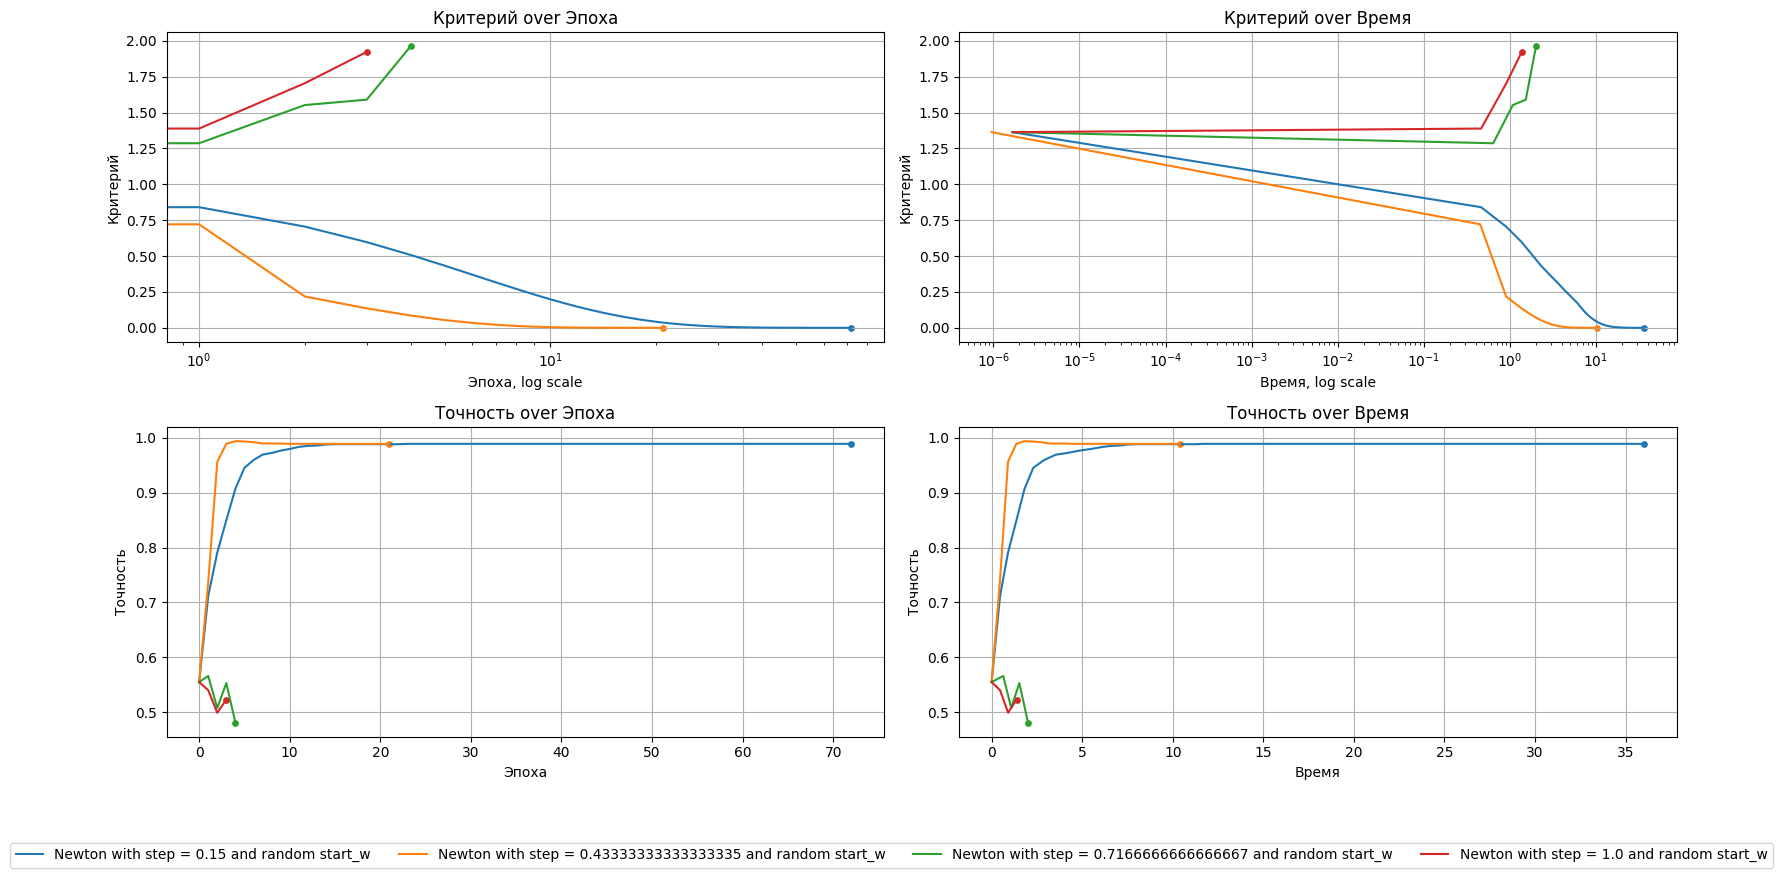

In [ ]:
steps = np.linspace(0.15, 1, 4)
weights = (start_w_mush, np.zeros(w_mush_shape), np.ones(w_mush_shape))
newtons = []
for step in steps:
  newtons.append((f'Newton with step = {step} and random start_w', Newton(step, mush_grad, mush_hess)))


draw_plots(check_approx_mush(newtons, start_w = start_w_mush), plots=plots)

Newton with step = 0.15 and zero start_w:  14%|█▎        | 68/500 [00:36<03:52,  1.86it/s, Loss=0.113, Accuracy=0.989, Grad norm=9.48e-6]
Newton with step = 0.43333333333333335 and zero start_w:   4%|▍         | 20/500 [00:11<04:24,  1.82it/s, Loss=0.113, Accuracy=0.989, Grad norm=8.59e-6]
Newton with step = 0.7166666666666667 and zero start_w:   2%|▏         | 10/500 [00:06<05:02,  1.62it/s, Loss=0.113, Accuracy=0.989, Grad norm=4.85e-6]
Newton with step = 1.0 and zero start_w:   1%|          | 5/500 [00:03<05:04,  1.62it/s, Loss=0.113, Accuracy=0.989, Grad norm=6.72e-8]


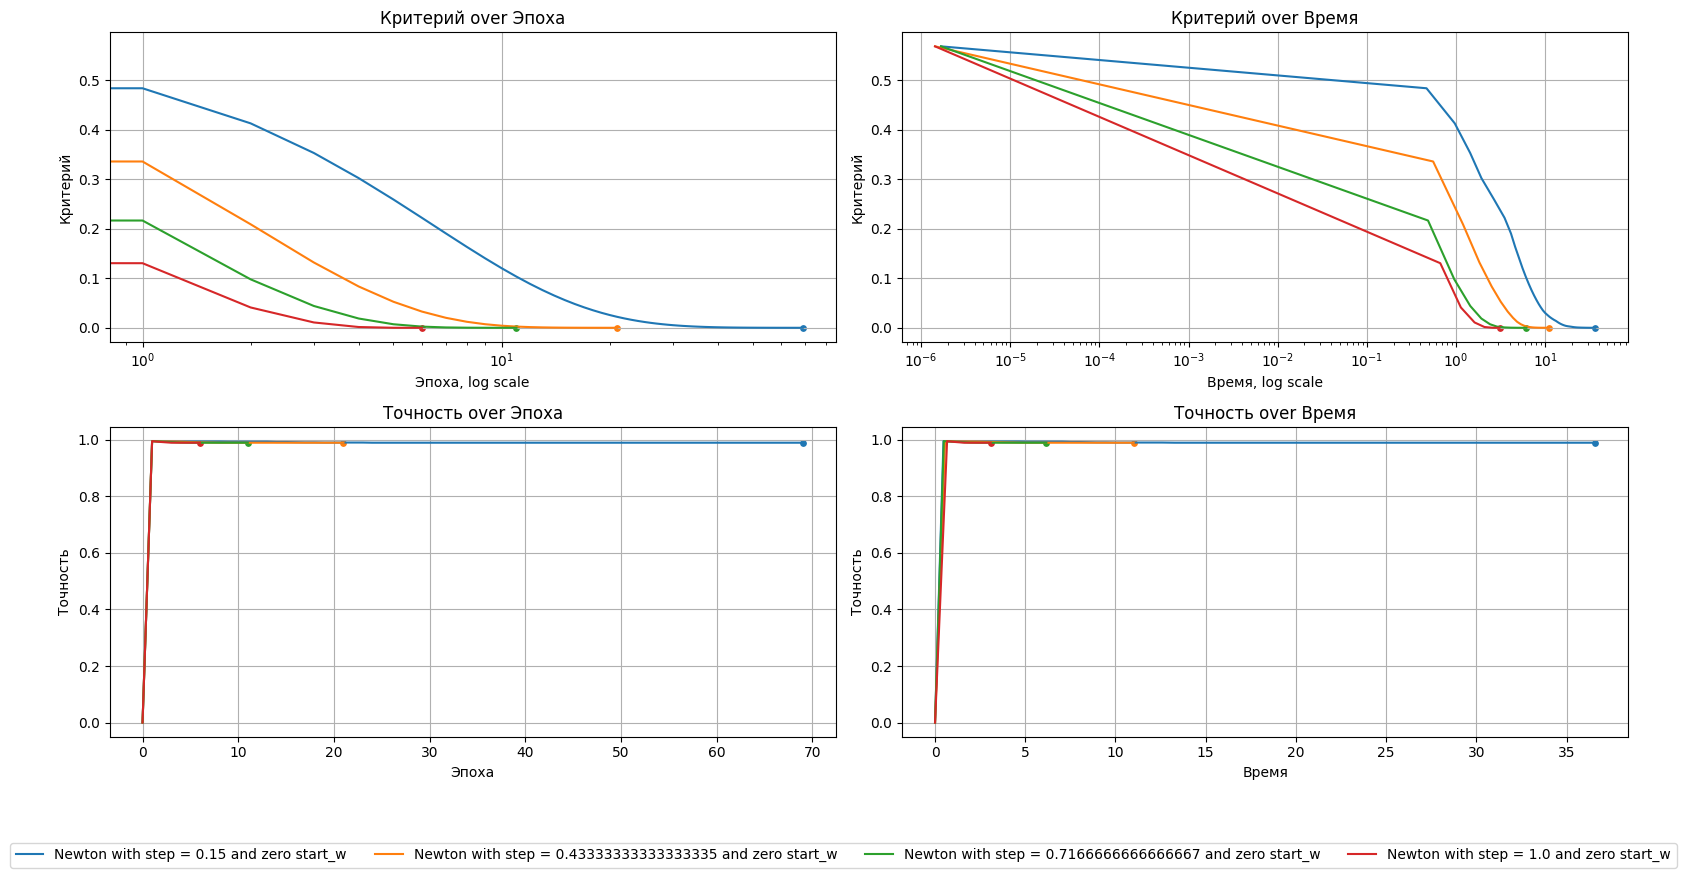

In [ ]:
newtons = []
for step in steps:
  newtons.append((f'Newton with step = {step} and zero start_w', Newton(step, mush_grad, mush_hess)))


draw_plots(check_approx_mush(newtons, start_w = np.zeros(w_mush_shape)), plots=plots)

Newton with step = 0.15 and identity start_w:  14%|█▍        | 71/500 [00:38<03:51,  1.86it/s, Loss=0.113, Accuracy=0.989, Grad norm=8.7e-6]
Newton with step = 0.43333333333333335 and identity start_w:   0%|          | 2/500 [00:00<04:02,  2.05it/s, Loss=92.2, Accuracy=0.519, Grad norm=1.9]<ipython-input-7-a50426355acd>:10: RuntimeWarning: overflow encountered in scalar power
  H += exp * (mat * mat.T) / (exp + 1) ** 2
Newton with step = 0.43333333333333335 and identity start_w: 100%|██████████| 500/500 [04:28<00:00,  1.86it/s, Loss=148, Accuracy=0.519, Grad norm=2.05]
Newton with step = 0.7166666666666667 and identity start_w:   0%|          | 0/500 [00:00<?, ?it/s]<ipython-input-6-b807e08ac0f0>:5: RuntimeWarning: overflow encountered in exp
  return (-train_mush_y.reshape(-1, 1) * train_mush_x / (1 + np.exp(train_mush_y * a_x).reshape(-1, 1))).sum(axis=0) / train_mush_x.shape[0] + lambd * w
Newton with step = 0.7166666666666667 and identity start_w:   0%|          | 2/500 [00:01<05:2

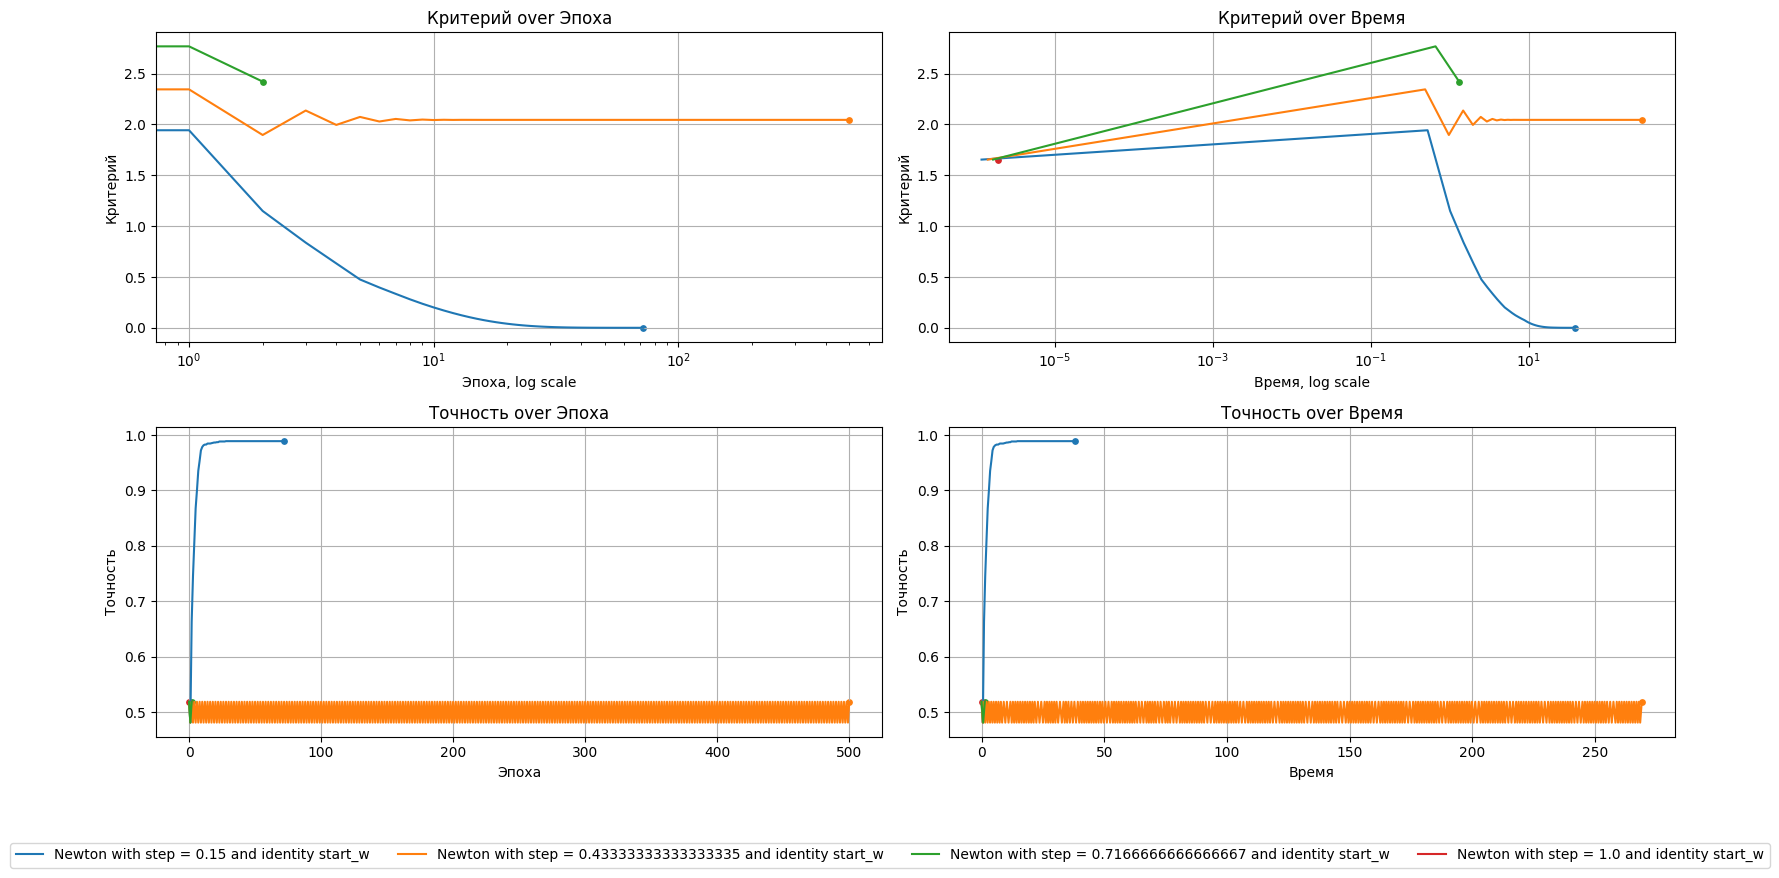

In [ ]:
newtons = []
for step in steps:
  newtons.append((f'Newton with step = {step} and identity start_w', Newton(step, mush_grad, mush_hess)))


draw_plots(check_approx_mush(newtons, start_w = np.ones(w_mush_shape)), plots=plots)

Метод Нютона очень мощный инструмент, ему хватает совсем немного итераций для того, чтобы прийти в оптимум. Однако стоит учитывать, что если будет сильно большой шаг или неправильная инициализация весов, то просто выйдем из окрестности и улетим в непонятно куда!

**Выводы**
- Если метод Ньютона сходится, то сходится очень быстро
- При рандомной инициализации весов все зависит от размера шага, если он достаточно небольшой, то алгоритм сойдется, иначе разойдется
- Нулевые веса - хорошая окрестность, оттуда при любом шаге мы приходим в оптимум
-Единичные веса - плохая окрестность - приходим в оптимум только с маленьким шагом


### Задание 9 (2 балла)

В этом задании вам нужно:
- Построить общий график для лучших методов из предыдущих заданий (градиентный спуск, метод тяжёлого шарика, метод Нестерова*, метод Ньютона)
- Объяснить, по каким критериям выбирали лучшие методы
- Сделать выводы. Какой метод наиболее предпочтителен? Почему?

### Решение

Выбирал по нескольким криттериям:
1. Те модели, которые сработают на общих инициализированных весах, чтобы получилось легко сделать общий график
2. Скорости обучения - особенно для метода Ньютона и тяжелого шарика
3. Скорости сходимости - для тяжелого шарика
4. По достигаемой точности - для стандартного градиента

Newton with step = 0.43 and random start_w:   4%|▍         | 21/500 [00:12<04:43,  1.69it/s, Loss=0.113, Accuracy=0.989, Grad norm=6.02e-6]


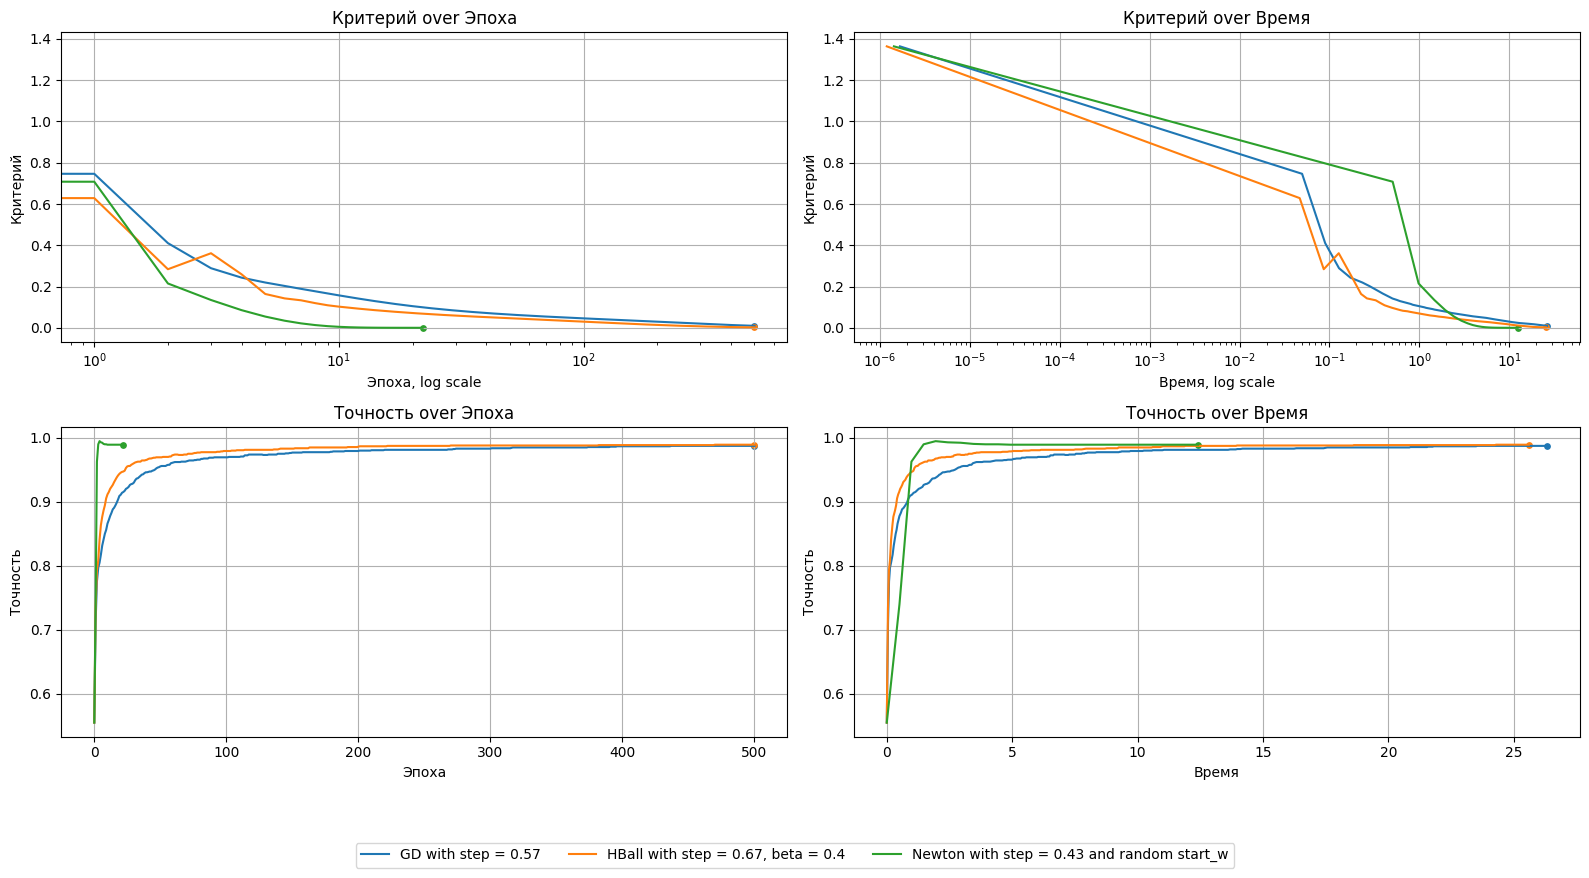

In [ ]:
best = [
    (f'GD with step = {0.57}', GD(0.57, mush_grad, mush_hess)),
    (f'HBall with step = {0.67}, beta = {0.4}', HBall(0.67, mush_grad, mush_hess, 0.4)),
    (f'Newton with step = {0.43} and random start_w', Newton(0.43, mush_grad, mush_hess))
]

draw_plots(check_approx_mush(best), plots=plots)

**Выводы**
- на начальных этапах м. Н. медленнее сходится к оптимуму, чем тяжелый шарик и градиент, однако потом в итоге все равно их перегоняет.
- градиент и тяжелый шарик подходят к оптимуму близко, но полностью его не достигают, а м. Н. достигает (даже если перебрать все гиперпараметры для каждого алгоритма по отдельности)
- самый лучший алгоритм для этой задачи - метод Нютона, так как эта фунция имеет $L$ - Липшицевый градиент, а также она $\mu$ - сильно-выпукла, поэтому можно быстро достичь оптимума, однако нужно начинать алгоритм из правильной окрестности

## Часть 2. Сравнение Numpy, PyTorch и JAX (12 + 11 балла)

В предыдущих частях вы в основном работали с Numpy, так как первая и вторая производные нашей функции могли быть теоретически вычислены. Однако, так бывает не всегда. В таких случаях прибегают к библиотекам, которые предоставляют функции автоматического дифференцирования. Одни из самых популярных (и знакомых вам из семинаров) - PyTorch и JAX. Это часть работы посвящена сравнению удобства и производительности трёх библиотек - Numpy, PyTorch и JAX - для реализации как простых математических операций, так и автоматического дифференцирования

### Задание 1 (1 балл)

В этом задании вам нужно:

- Реализовать функцию `measure_script_time()`, которая
  - Принимает другую функцию, аргументы для неё, количество повторений вызова и количество "разгоночных вызовов" (warm up calls)
  - Совершает "разгоночные вызовы" переданной функции, а затем замеряет среднее время работы переданной функции на переданном количестве повторений
  - Возвращает среднее время работы переданной функции в миллисекундах
- Зафиксировать для всех дальнейших экспериментов количество повторений равное 50 и количество "разгоночных вызовов" равное 5
- Предположить, для чего нужны "разгоночные вызовы"

### Решение

In [ ]:
def measure_script_time(f, arg, reps = 50, warm_ups = 5):
  for i in range(warm_ups):
    f(*arg)
  start_time = time.time()
  for i in range(reps):
    f(*arg)

  return (time.time() - start_time) / reps

In [ ]:
# костыльное решение для частного случая
def measure_script_time_second(f, arg, reps = 50, warm_ups = 5):
  for i in range(warm_ups):
    f(arg)
  start_time = time.time()
  for i in range(reps):
    f(arg)

  return (time.time() - start_time) / reps

Возможно, разгоночные веса нужны для того, чтобы разогнать работу процессора, запустить ее как-то под капотом

### Задание 2 (4 баллов)

В этом задании вам нужно:

- Реализовать функцию, которая будет измерять среднее время выполнения для каждой из библиотек (Numpy, PyTorch и JAX) следующих операций:
  - Матричного умножения (сделайте замеры для матриц размером 100, 500, 1000 и 2000)
  - Матричного сложения (сделайте замеры для матриц размером 100, 500, 1000 и 3000)
  - Поэлементного умножения двух матриц (сделайте замеры для матриц размером 100, 500, 1000 и 3000)
- Постройте соответствующие графики (отдельный график для каждой операции)
- Сделайте выводы

**ПРИМЕЧАНИЕ**: Для экспериментов дайте возможность генерировать две случайные матрицы на базе переданного seed. Зафиксируйте одно значение seed и используйте его для всех экспериментов. Очевидно, матрицы для всех трёх библиотек должны быть одинаковые. Как вариант, генерировать случайные матрицы с помощью `np.random.rand`, а затем, с помощью `torch.from_numpy` и `jnp.array`, переводить их в структуры других библиотек. Наконец, сделайте так, чтобы все матрицы во всех библиотеках были типа **float32**: `np.float32`, `torch.float32` и `jnp.float32`

### Решение

In [ ]:
def mat_multiplication(m1, m2):
  return m1 @ m2

def mat_sum(m1, m2):
  return m1 + m2

def multiplication(m1, m2):
  return m1 * m2

In [ ]:
def NumTorchAx_1(seed):
  np.random.seed(seed)

  line_graphs = {}
  line_graphs['matmul'] = {}
  line_graphs['matsum'] = {}
  line_graphs['mul'] = {}

  line_graphs['matmul']['numpy'] = []
  line_graphs['matmul']['torch'] = []
  line_graphs['matmul']['jax'] = []

  line_graphs['matsum']['numpy'] = []
  line_graphs['matsum']['torch'] = []
  line_graphs['matsum']['jax'] = []

  line_graphs['mul']['numpy'] = []
  line_graphs['mul']['torch'] = []
  line_graphs['mul']['jax'] = []

  for shape in (100, 500, 1000, 2000):

    np_mat = np.float32(np.random.rand(shape, shape))
    tens_mat = torch.from_numpy(np_mat)
    jnp_mat = jnp.array(np_mat)

    # матричное умножение
    line_graphs['matmul']['numpy'].append(measure_script_time(mat_multiplication, (np_mat, np_mat)))
    line_graphs['matmul']['torch'].append(measure_script_time(mat_multiplication, (tens_mat, tens_mat)))
    line_graphs['matmul']['jax'].append(measure_script_time(mat_multiplication, (jnp_mat, jnp_mat)))

  for shape in (100, 500, 1000, 3000):

    np_mat = np.float32(np.random.rand(shape, shape))
    tens_mat = torch.from_numpy(np_mat)
    jnp_mat = jnp.array(np_mat)

    # матричное сложение
    line_graphs['matsum']['numpy'].append(measure_script_time(mat_sum, (np_mat, np_mat)))
    line_graphs['matsum']['torch'].append(measure_script_time(mat_sum, (tens_mat, tens_mat)))
    line_graphs['matsum']['jax'].append(measure_script_time(mat_sum, (jnp_mat, jnp_mat)))

    # поэлементное умножение
    line_graphs['mul']['numpy'].append(measure_script_time(multiplication, (np_mat, np_mat)))
    line_graphs['mul']['torch'].append(measure_script_time(multiplication, (tens_mat, tens_mat)))
    line_graphs['mul']['jax'].append(measure_script_time(multiplication, (jnp_mat, jnp_mat)))

  return line_graphs

In [ ]:
line_graphs = NumTorchAx_1(42)

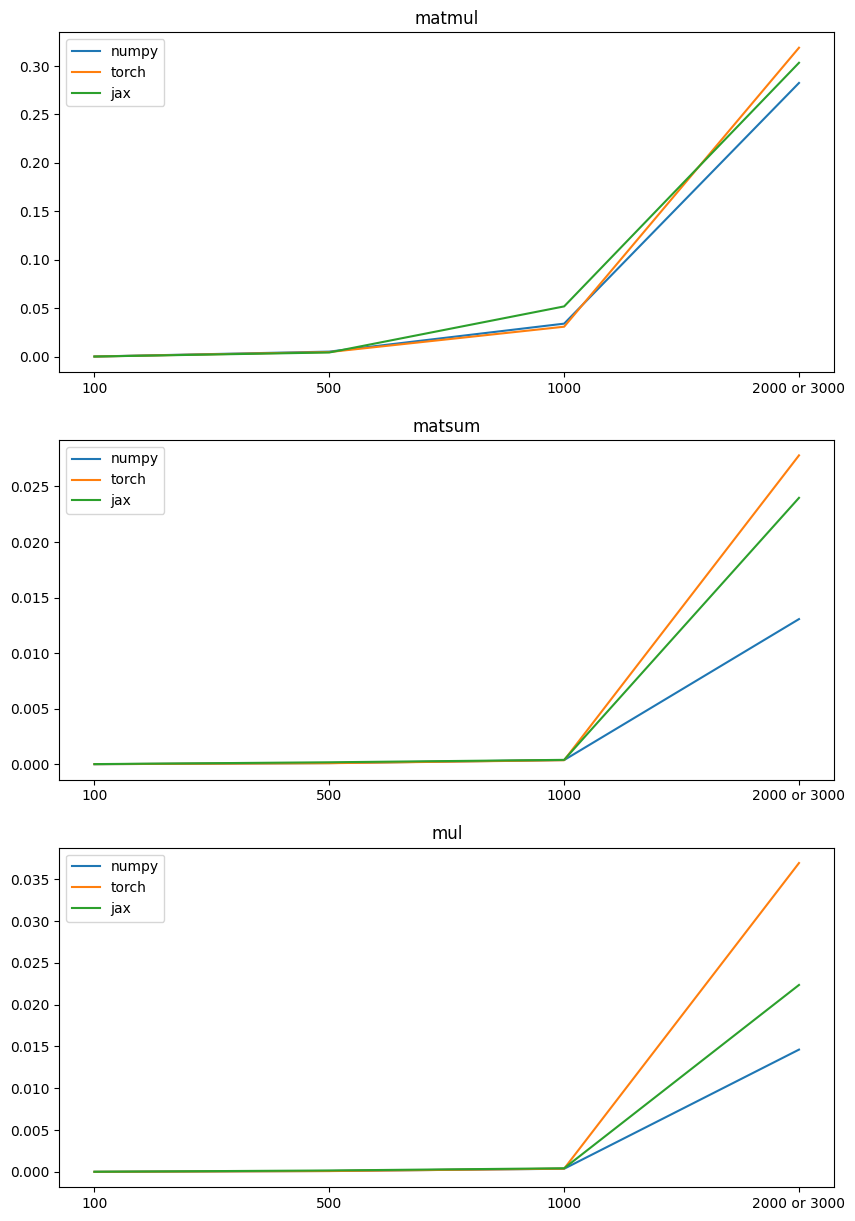

In [ ]:
plt.figure(figsize= (10,15))
x_axis = [100, 500, 1000, '2000 or 3000']
i = 1
for key in line_graphs.keys():
    plt.subplot(3,1,i)
    plt.plot(x_axis, line_graphs[key]['numpy'])
    plt.plot(x_axis, line_graphs[key]['torch'])
    plt.plot(x_axis, line_graphs[key]['jax'])
    plt.legend(['numpy','torch','jax'], loc=2)

    plt.title(f'{key}')
    i += 1

plt.show()

На простых операциях быстрее всех работает numpy, медленнее всех torch. Особенно видна разница на поэлементном умножении.

### Задание 3 (3 балла)

В этом задании вам нужно:

- Реализовать функцию, аналогичную функции из предыдущего задания (с сохранением всех примечаний!), но уже для следующих операций:
  - Вычисление собственных значений матрицы (сделайте замеры для матрицы размером 10, 50, 100 и 150)
  - Вычисление обратной матрицы (сделайте замеры для матрицы размером 10, 50, 100 и 150)
  - SVD разложение матрицы (сделайте замеры для матрицы размером 10, 50, 100 и 150)
- Постройте соответствующие графики (отдельный график для каждой операции)
- Сделайте выводы

### Решение

In [ ]:
def NumTorchAx_2(seed):
  np.random.seed(seed)

  line_graphs = {}
  line_graphs['eig'] = {}
  line_graphs['inv'] = {}
  line_graphs['svd'] = {}

  line_graphs['eig']['numpy'] = []
  line_graphs['eig']['torch'] = []
  line_graphs['eig']['jax'] = []

  line_graphs['inv']['numpy'] = []
  line_graphs['inv']['torch'] = []
  line_graphs['inv']['jax'] = []

  line_graphs['svd']['numpy'] = []
  line_graphs['svd']['torch'] = []
  line_graphs['svd']['jax'] = []

  for shape in (10, 50, 100, 150):

    np_mat = np.float32(np.random.rand(shape, shape))
    tens_mat = torch.from_numpy(np_mat)
    jnp_mat = jnp.array(np_mat)

    # собственные значения
    line_graphs['eig']['numpy'].append(measure_script_time_second(np.linalg.eig, (np_mat)))
    line_graphs['eig']['torch'].append(measure_script_time_second(torch.linalg.eigvals, (tens_mat)))
    line_graphs['eig']['jax'].append(measure_script_time_second(jnp.linalg.eigvals, (jnp_mat)))

    # обратное разложение
    line_graphs['inv']['numpy'].append(measure_script_time_second(np.linalg.inv, (np_mat)))
    line_graphs['inv']['torch'].append(measure_script_time_second(torch.linalg.inv, (tens_mat)))
    line_graphs['inv']['jax'].append(measure_script_time_second(jnp.linalg.inv, (jnp_mat)))

    # обратное разложение
    line_graphs['svd']['numpy'].append(measure_script_time_second(np.linalg.svd, (np_mat)))
    line_graphs['svd']['torch'].append(measure_script_time_second(torch.linalg.svd, (tens_mat)))
    line_graphs['svd']['jax'].append(measure_script_time_second(jnp.linalg.svd, (jnp_mat)))

  return line_graphs

In [ ]:
res = NumTorchAx_2(42)

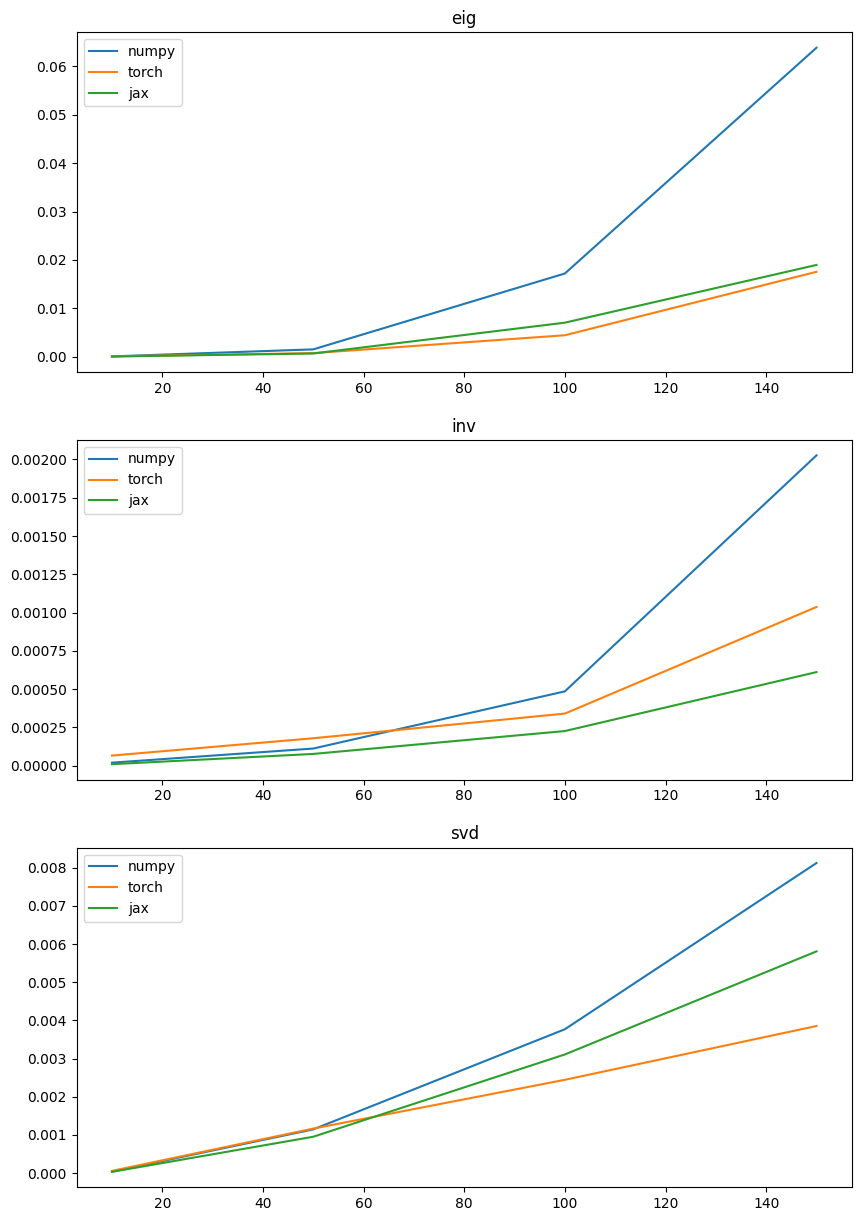

In [ ]:
plt.figure(figsize= (10,15))
x_axis = [10, 50, 100, 150]
i = 1
for key in res.keys():
    plt.subplot(3,1,i)
    plt.plot(x_axis, res[key]['numpy'])
    plt.plot(x_axis, res[key]['torch'])
    plt.plot(x_axis, res[key]['jax'])
    plt.legend(['numpy','torch','jax'], loc=2)

    plt.title(f'{key}')
    i += 1

plt.show()

Ну тут уже совсем по другому обстоят дела. Numpy работает уже гораздо хуже для более сложных операций. Torch и jax в этом плане начинают доминировать (torch - svd, eig; jax - inv)

### Задание 4 (4 балла)

От сравнения реализации математических функций перейдём к сравнению автоматического дифференцирования. Так как Numpy не предоставляет возможности автоматического дифференцирования, для этой библиотеки вам нужно будет аналитически получить производную и реализовать её как функцию (как градиент для логистической регрессии из предыдущей части, например). Обязательно опишите процесс вывода производной


В этом задании вам нужно:

- Реализовать функцию, аналогичную функции из предыдущего задания (с сохранением всех примечаний!), но уже для операции автоматического дифференцирования (кроме Numpy: по поводу него - выше). Для дифференцирования используйте следующие функции:
  - Любая квадратичная функция вида $ax^2 +bx+c$ с поэлементный возведением в квадрат. Зафиксируйте параметры $a$, $b$ и $c$. (Сделайте замеры для матрицы размером 10, 50, 200, 500 и 1000)
  - Любая функция, использующая тригонометрические функции. Например, $e^{sin(x^2)}$ с поэлементный возведением в квадрат. (Сделайте замеры для матрицы размером 10, 50, 200, 500 и 1000)
- Постройте соответствующие графики (отдельный график для каждой функции)
- Сделайте выводы не только о производительности, но и об удобстве интерфейса библиотек

**Примечание:** Если вы будете используйте `.backward()` в библиотеке PyTorch, то вы можете столкнуться со следующей ошибкой - результат перечисленных выше функций является матрицей, а `.backward()` можно вызвать только для скаляра. В таком случае, вы можете обернуть функцию в $torch.sum()$, что эквивалентно суммированию координат получившейся матрицы. Однако не забудьте сделать то же самое и для других библиотек

### Решение

1. У нас тут происходит из матрицы в матрицу $d(ax^2 + bx + c) = (2ax + b)dx$

2. Здесь то же самое в целом: $d(e^{sin(x^2)}) = e^{sin(x^2)} \cdot d(sin(x^2)) = e^{sin(x^2)} \cdot cos(x^2) \cdot d(x^2) = e^{sin(x^2)} \cdot cos(x^2) \cdot 2x dx$

В моем кейсе $ax^2 + bx + c = 236x^2 -7x + 3$

In [ ]:
def np_diff_1(mat):
  return 2 * 236 * mat - 7

def np_diff_2(mat):
  return np.exp(np.sin(mat ** 2)) * np.cos(mat ** 2) * 2 * mat


def torch_diff_1(mat):
  res = (236 * mat ** 2 - 7 * mat + 3).sum()
  res.backward()
  return mat.grad

def torch_diff_2(mat):
  res = torch.exp(torch.sin(mat**2)).sum()
  res.backward()
  return mat.grad


def jax_f1(mat):
  return (236 * mat ** 2 - 7 * mat + 3).sum()

def jax_diff_1(mat):
  gradj = jax.grad(jax_f1)
  return gradj(mat) # .sum(axis=1).sum(axis=1)


def jax_f2(mat):
  return (jnp.exp(jnp.sin(mat**2))).sum()

def jax_diff_2(mat):
  gradj = jax.grad(jax_f2)
  return gradj(mat) # .sum(axis=1).sum(axis=1)

In [ ]:
tens = torch.from_numpy(np.float32(np.random.rand(3, 3)))
tens.requires_grad_()
res = torch.exp(torch.sin(tens**2)).sum()
res.backward()
tens.grad

tensor([[2.5245, 0.2283, 0.5613],
        [0.3574, 2.0511, 2.1223],
        [0.3017, 2.3629, 1.6520]])

In [ ]:
def NumTorchAx_3(seed):
  np.random.seed(seed)

  line_graphs = {}
  line_graphs['trinomial'] = {}
  line_graphs['exp^(sin(x^2))'] = {}


  line_graphs['trinomial']['numpy'] = []
  line_graphs['trinomial']['torch'] = []
  line_graphs['trinomial']['jax'] = []

  line_graphs['exp^(sin(x^2))']['numpy'] = []
  line_graphs['exp^(sin(x^2))']['torch'] = []
  line_graphs['exp^(sin(x^2))']['jax'] = []

  for shape in (10, 50, 200, 500, 1000):

    np_mat = np.float32(np.random.rand(shape, shape))
    tens_mat = torch.from_numpy(np_mat)
    tens_mat.requires_grad_()
    jnp_mat = jnp.array(np_mat)

    # квадратный трехчлен
    line_graphs['trinomial']['numpy'].append(measure_script_time_second(np_diff_1, (np_mat)))
    line_graphs['trinomial']['torch'].append(measure_script_time_second(torch_diff_1, (tens_mat)))
    line_graphs['trinomial']['jax'].append(measure_script_time_second(jax_diff_1, (jnp_mat)))

    # сложная функция
    line_graphs['exp^(sin(x^2))']['numpy'].append(measure_script_time_second(np_diff_2, (np_mat)))
    line_graphs['exp^(sin(x^2))']['torch'].append(measure_script_time_second(torch_diff_2, (tens_mat)))
    line_graphs['exp^(sin(x^2))']['jax'].append(measure_script_time_second(jax_diff_2, (jnp_mat)))

  return line_graphs

In [ ]:
A = jnp.array([[1.0, 2.0], [3.0, 4.0]])
df_dA = jax.jacrev(jax_f1)(A)
df_dA

Array([[[[ 465.,    0.],
         [   0.,    0.]],

        [[   0.,  937.],
         [   0.,    0.]]],


       [[[   0.,    0.],
         [1409.,    0.]],

        [[   0.,    0.],
         [   0., 1881.]]]], dtype=float32)

In [ ]:
res = NumTorchAx_3(42)

**Выводы**
- ...

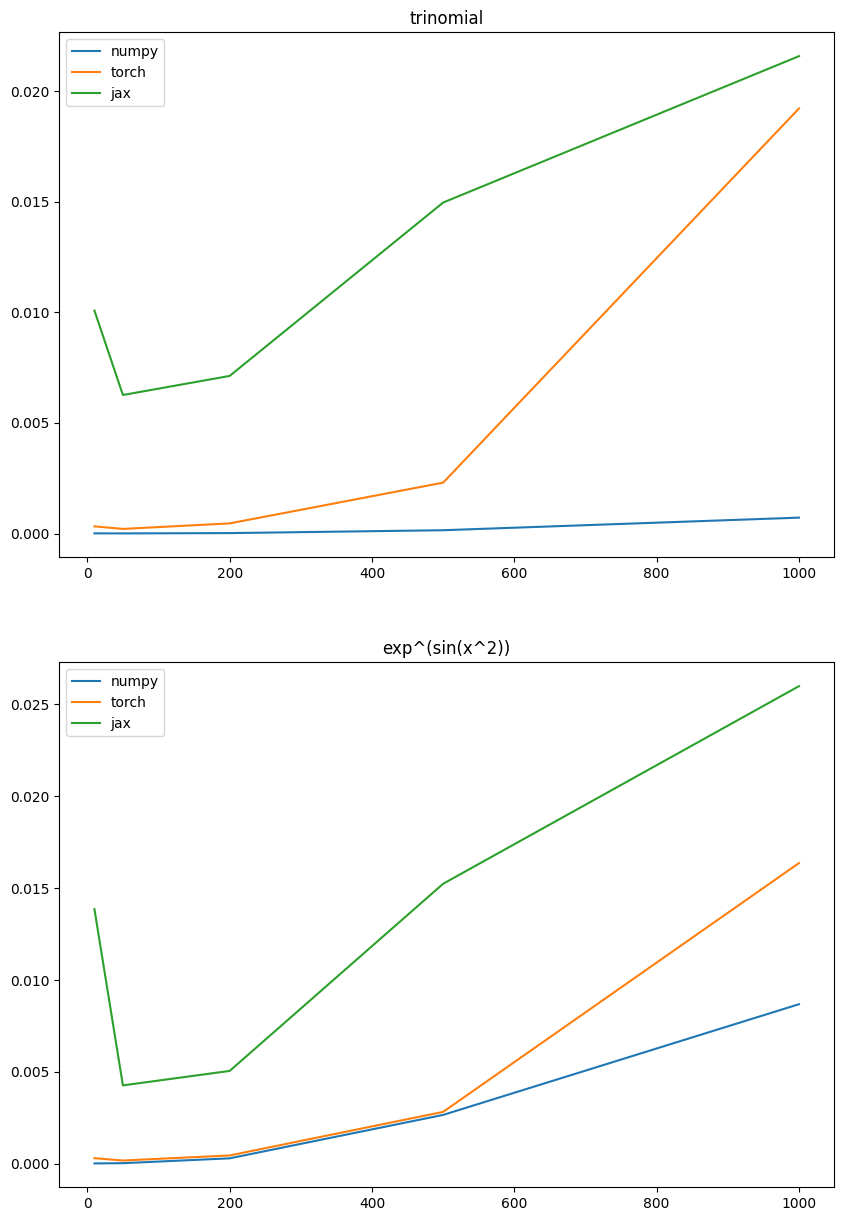

In [ ]:
plt.figure(figsize= (10,15))
x_axis = [10, 50, 200, 500, 1000]
i = 1
for key in res.keys():
    plt.subplot(2,1,i)
    plt.plot(x_axis, res[key]['numpy'])
    plt.plot(x_axis, res[key]['torch'])
    plt.plot(x_axis, res[key]['jax'])
    plt.legend(['numpy','torch','jax'], loc=2)

    plt.title(f'{key}')
    i += 1

plt.show()

В дифференцировании jax уже имеет явное преимущество над torch. Numpy вообще медленнее всего работает, с ростом размерности матрицы эта разница увеличивается.

### Задание 5* (3 балла)

Теперь попробуем провести сравнение в контексте реальной задачи. Очень кстати у нас есть функция логистической регрессии из предыдущей части. До этого мы использовали явно найденную функцию градиента для реализации, например, градиентного спуска. Теперь же попробуем использовать автоматическое дифференцирование с помощью JAX и PyTorch

В этом задании вам нужно:

- Написать функцию для вычисления значения $f(w)$ (как в задании 2 части 3) с использованием библиотеки PyTorch
- Написать функцию для вычисления значения $f(w)$ (как в задании 2 части 3) с использованием библиотеки JAX. Подсказка: используйте `@jax.jit`
- Удостовериться, что значения написанных функций совпадают со значением функции из задания 2 части 3 в начальной точке
- Написать функции, позволяющие находить значение градиента и гессиана в точке с использованием автоматического дифференцирования из библиотек PyTorch И JAX
- Удостовериться, что значения градиентов и гессианов функций, вычисленных с использованием автоматического дифференцирования, совпадают со значением аналитического градиента и гессиана функции из задания 2 части 3 в начальной точке

### Решение

In [ ]:
# ваше решение (code + markdown)

### Задание 6* (4 балла)

Теперь на базе предыдущего задания реализуем градиентный спуск

В этом задании вам нужно:
- Реализовать градиентный спуск, используя функции с автоматическим дифференцированием из PyTorch из предыдущего задания, как класс, унаследованный от `AutomaticSolver` (определён ниже)
- Реализовать градиентный спуск, используя функции с автоматическим дифференцированием из JAX из предыдущего задания, как класс, унаследованный от `AutomaticSolver` (определён ниже)
- Запустить три версии градиентно спуска: с использованием Numpy (задание 3 часть 3), PyTorch и JAX на датасете mushrooms на 500 эпохах и фиксированным шагом (например, $\gamma_k=\frac{1}{L}$). Используйте `check_approx_mush`
- Построить сравнительные графики (как в задании 3 части 3)
- Сделать выводы, в том числе
  - Какой подход оказался самым эффективным? Как определяли эффективность?
  - Какой подход самый удобный с точки зрения пользовательского опыта? Почему?

**Примечание:** Заметьте, что входные и входные данные функции `step()` класса `AutomaticSolver` имеют тип `np.ndarray`. Это сделано для согласования с функцией `check_approx_mush`. В частности это значит, что внутри функции `step()` нужно сделать необходимые преобразования типов

In [ ]:
class AutomaticSolver(BaseSolver):
    def __init__(
        self,
        lr: float | Callable,
        f: Callable,
    ) -> None:
        self.f = f
        self.lr = lr if isinstance(lr, Callable) else lambda _: lr

    def step(self, x: np.ndarray, k: int) -> np.ndarray:
        # эту функцию должны переопределить наследуемые классы
        raise NotImplementedError

### Решение

In [ ]:
# ваше решение (code + markdown)

**Выводы**
- ...

### Задание 7* (4 балла)

Увеличим ставки и протестируем наши подходе на методе второго порядка - методе Ньютона

В этом задании вам нужно:
- Реализовать метод Ньютона, используя функции с автоматическим дифференцированием из PyTorch из предыдущего задания, как класс, унаследованный от `AutomaticSolver`
- Реализовать метод Ньютона, используя функции с автоматическим дифференцированием из JAX из предыдущего задания, как класс, унаследованный от `AutomaticSolver`
- Запустить три версии метода Ньютона: с использованием Numpy (задание 8 часть 3), PyTorch и JAX на датасете mushrooms на 500 эпохах и фиксированным шагом (например, $\gamma_k=\frac{1}{L}$). Используйте `check_approx_mush`
- Построить сравнительные графики (как в задании 8 части 3)
- Сделать выводы, в том числе
  - Какой подход оказался самым эффективным? Как определяли эффективность?
  - Какой подход самый удобный с точки зрения пользовательского опыта? Почему?

### Решение

In [ ]:
# ваше решение (code + markdown)

**Выводы**
- ...

# <a id='day3'></a> День 3 (12 баллов)

## Часть 1. Шаг обучения (12 баллов)

Один из важных аспектов тренировки нейронных сетей с использованием PyTorch — использование `lr_scheduler` (Learning Rate Scheduler). Этот инструмент позволяет динамически изменять скорость обучения во время тренировки модели, что может значительно повлиять на конечные результаты

Используя `lr_scheduler` вместо константного шага, как это обычно делается, помогает достичь большей стабильности обучения, миновать локальные минимумы, а также предотвратить переобучение модели. Однако, требуется тщательная настройка и подбор параметров: в некоторых случаях динамическое изменение скорости обучения может увеличить общее время тренировки модели, особенно если параметры выбраны неверно

В этой части работы вам предстоит попробовать разные варианты scheduler'а и проанализировать их влияние на процесс обучения

### Задание 1 (2 балла)

Для примера, рассмотрим `ExponentialLR`, принимающий единственный параметр - $\gamma$

Так его выглядит формула обновления шага $\eta$ для $k$-той итерации:

$$
\eta_k = \gamma \eta_{k-1}
$$

Заполните функции ниже, чтобы отобразить изменение шага обучения в зависимости от параметра $\gamma$



### Решение

In [ ]:
def plot_learning_rates(
    schedulers: list[
        tuple[
            str, Callable[[torch.optim.Optimizer], torch.optim.lr_scheduler.LRScheduler]
        ]
    ],
    start_lr: float,
    steps: int,
    title: str,
):
    model = torch.nn.Linear(1, 1)
    for name, scheduler_lambda in schedulers:
        optimizer = torch.optim.SGD(model.parameters(), lr=start_lr)

        scheduler = scheduler_lambda(optimizer)

        lrs = []

        #with warnings.catch_warnings(action="ignore"):
        for _ in range(steps):
          lrs.append(optimizer.param_groups[0]["lr"]) # TODO

          optimizer.step()
          scheduler.step()

        plt.plot(list(range(steps)), lrs, label=name) # TODO

    plt.xlabel("Step")
    plt.ylabel("Learning rate")
    columns = math.ceil(len(schedulers) / 3)
    plt.legend(loc="lower center", ncol=3, bbox_to_anchor=(0.5, -0.2 - 0.05 * columns))
    plt.title(title)
    plt.show()

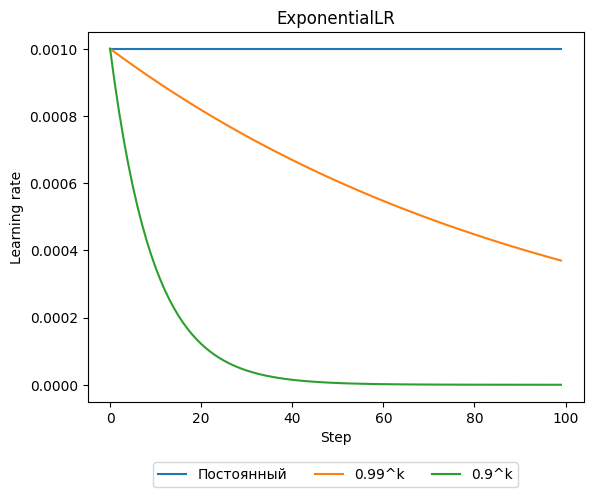

In [ ]:
plot_learning_rates(
    [
        ("Постоянный", partial(torch.optim.lr_scheduler.ExponentialLR, gamma=1)), # TODO
        ("0.99^k", partial(torch.optim.lr_scheduler.ExponentialLR, gamma=0.99)), # TODO
        ("0.9^k", partial(torch.optim.lr_scheduler.ExponentialLR, gamma=0.9)), # TODO
    ],
    start_lr=1e-3,
    steps=100,
    title="ExponentialLR",
)

### Задание 2 (5 баллов)

Используя официальную [документацию](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate), попробуйте **минимум три** любых различных scheduler'a, помимо `ExponentialLR`

Для каждого (кроме, возможно, CyclicLR) напишите формулу обновления шага, как было сделано в предыдущем задании, и постройте график, в котором варьируете параметры scheduler'a (**минимум 4 вариации**). К графикам добавьте соответствующие заголовки и легенды. Используйте функции из предыдущего задания

Для этого задания зафиксируйте `start_lr=100` и `steps=100`

### Решение

$StepLR:$

$$
\eta_{k} = \begin{cases}
             \gamma \eta_{k-1}, & k \ \% \ stepsize = 0\\
             \eta_{k-1}, & k \ \% \ stepsize \neq 0
            \end{cases}\\
$$

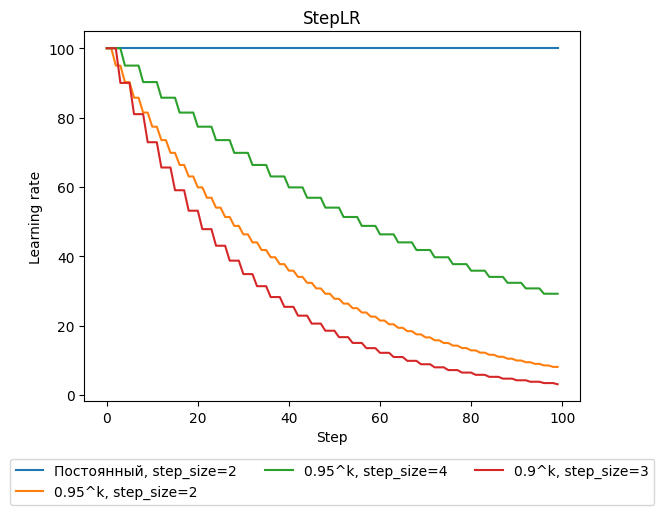

In [ ]:
plot_learning_rates(
    [
        ("Постоянный, step_size=2", partial(torch.optim.lr_scheduler.StepLR, step_size=2, gamma=1)), # TODO
        ("0.95^k, step_size=2", partial(torch.optim.lr_scheduler.StepLR, step_size=2, gamma=0.95)), # TODO
        ("0.95^k, step_size=4", partial(torch.optim.lr_scheduler.StepLR, step_size=4, gamma=0.95)),
        ("0.9^k, step_size=3", partial(torch.optim.lr_scheduler.StepLR, step_size=3, gamma=0.9))
    ],
    start_lr=100,
    steps=100,
    title="StepLR",
)

$CyclicLR - triangular$

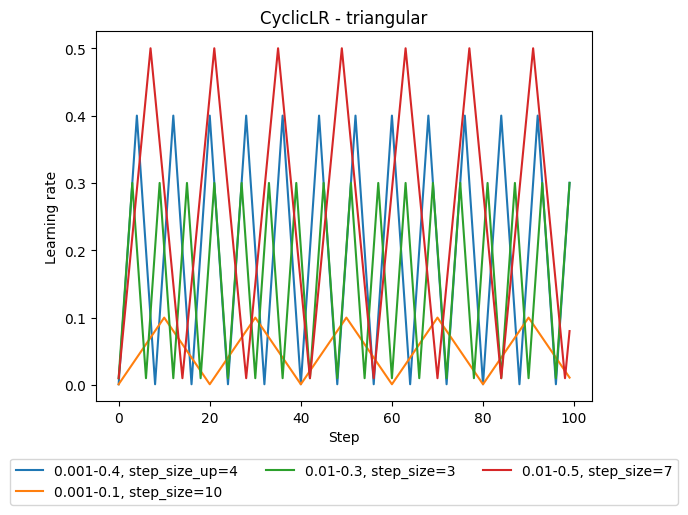

In [ ]:
plot_learning_rates(
    [
        ("0.001-0.4, step_size_up=4", partial(torch.optim.lr_scheduler.CyclicLR, base_lr=0.001, max_lr=0.4,step_size_up=4, mode="triangular")), # TODO
        ("0.001-0.1, step_size=10", partial(torch.optim.lr_scheduler.CyclicLR, base_lr=0.001, max_lr=0.1,step_size_up=10, mode="triangular")), # TODO
        ("0.01-0.3, step_size=3", partial(torch.optim.lr_scheduler.CyclicLR, base_lr=0.01, max_lr=0.3,step_size_up=3, mode="triangular")),
        ("0.01-0.5, step_size=7", partial(torch.optim.lr_scheduler.CyclicLR, base_lr=0.01, max_lr=0.5,step_size_up=7, mode="triangular"))
    ],
    start_lr=100,
    steps=100,
    title="CyclicLR - triangular",
)

$LambdaLR:$
$$
\eta_k = \eta_0 \cdot λ_i(k) \\
λ_1(k) = \frac{1}{k + 1} \\
λ_2(k) = \frac{1}{3k + 1}\\
λ_3(k) = 0.8^{k} \\
λ_4(k) = 0.3 \cdot e^{\frac{1}{k + 1}}
$$

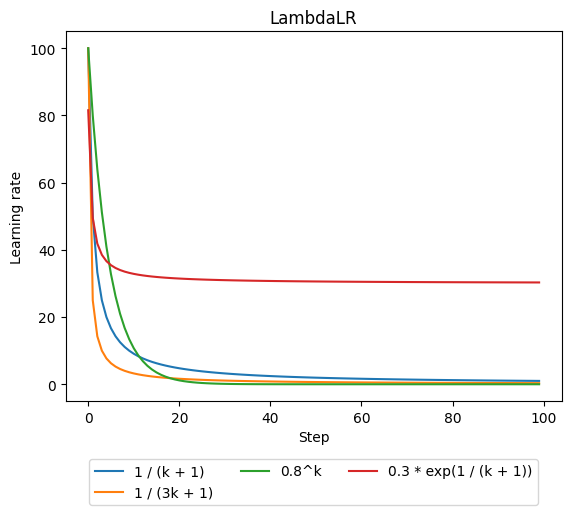

In [ ]:
plot_learning_rates(
    [
        ("1 / (k + 1)", partial(torch.optim.lr_scheduler.LambdaLR, lr_lambda=lambda epoch: 1 / (epoch + 1))), # TODO
        ("1 / (3k + 1)", partial(torch.optim.lr_scheduler.LambdaLR, lr_lambda=lambda epoch: 1 / (3 * epoch + 1))), # TODO
        ("0.8^k", partial(torch.optim.lr_scheduler.LambdaLR, lr_lambda=lambda epoch: 0.8 ** epoch)),
        ("0.3 * exp(1 / (k + 1))", partial(torch.optim.lr_scheduler.LambdaLR, lr_lambda=lambda epoch: 0.3 * np.exp(1 / (epoch + 1))))
    ],
    start_lr=100,
    steps=100,
    title="LambdaLR",
)

### Задание 3 (5 баллов)

Используя официальную [документацию](https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate), предложите **минимум 3** различных
схемы выбора шага, которые покажут результат на MNIST лучше, чем предложенные ниже (базовые) схемы

Для начала, закончите функцию `check_schedulers_mnist()` и постройте необходимые графики для базовых схем с помощью функции `plot_lr_loss()`. Вам понадобятся функции `train_mnist()` и `eval_mnist()`

Чтобы удостовериться, что выбранные схемы лучше, воспользуйтесь функцией `check_supremacy()`. Если проверка не проведена или провалена, **задание автоматически считается невыполненным**

Для каждой вашей схемы (кроме, возможно, CyclicLR), напишите явную формулу обновления шага

Постройте следующие графики для всех (базовых + ваших) схем:
- График зависимости ошибки (loss) на тестовых данных от эпохи
- График зависимости точности (accuracy) на тестовых данных от эпохи
- График зависимости шага обучения от эпохи
Используйте функцию `plot_lr_loss()`


Сделайте выводы

In [ ]:
plot_lr_loss = partial(
    draw_plots,
    plots=[
        ({"name": "Epoch"}, {"name": "Test Loss", "log": True}),
        ({"name": "Epoch"}, {"name": "Learning Rate"}),
        ({"name": "Epoch"}, {"name": "Accuracy"}),
    ],
)

In [ ]:
def check_supremacy(my_data: dict, baseline_data: dict):
    for name, data in my_data.items():
        for b_name, b_data in baseline_data.items():
            if max(b_data["Accuracy"]) >= max(data["Accuracy"]) or min(
                b_data["Test Loss"]
            ) <= min(data["Test Loss"]):
                raise Exception(f"'{name}' does not beat '{b_name}'")

### Решение

In [ ]:
def check_schedulers_mnist(
    schedulers: list[
        tuple[
            str, Callable[[torch.optim.Optimizer], torch.optim.lr_scheduler.LRScheduler]
        ]
    ],
) -> dict:
    start_lr = 1e-2
    epochs = 30
    results_dict = {}

    for name, scheduler_lambda in schedulers:
        test_losses = []
        accuracies = []
        lrs = []

        torch.manual_seed(420)
        model = MnistModel().to(DEVICE)
        optimizer = torch.optim.SGD(model.parameters(), lr=start_lr)
        scheduler = scheduler_lambda(optimizer)

        with tqdm(range(epochs), desc=name) as loop:
            for _ in loop:
                # train
                train_mnist(model, optimizer)

                # eval
                loss, acc = eval_mnist(model)

                # log
                test_losses.append(loss)
                accuracies.append(acc)
                lrs.append(optimizer.param_groups[0]["lr"])


                # scheduler step
                scheduler.step()

                loop.set_postfix({"Loss": loss, "Accuracy": acc}) # TODO

        results_dict[name] = {
            "Learning Rate": lrs,
            "Epoch": list(range(epochs)),
            "Test Loss": test_losses,
            "Accuracy": accuracies,
        }

    return results_dict

Baseline: 100%|██████████| 30/30 [00:13<00:00,  2.25it/s, Loss=1.71, Accuracy=0.74]


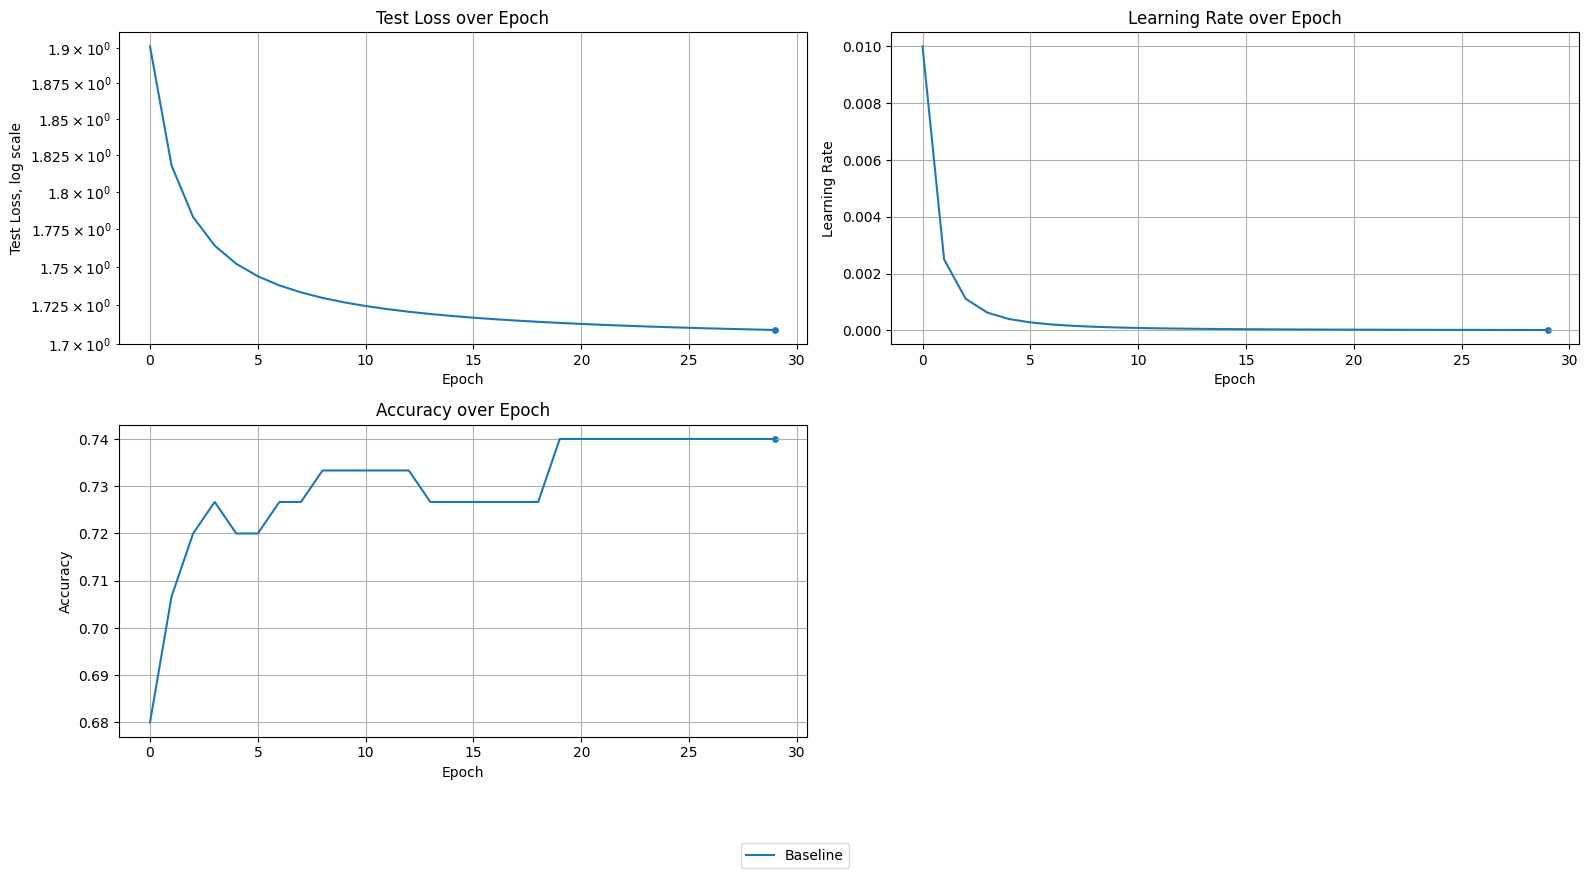

In [ ]:
# эту ячейку изменять не нужно!

baseline_data = check_schedulers_mnist(
    [
        (
            "Baseline",
            partial(
                torch.optim.lr_scheduler.LambdaLR,
                lr_lambda=lambda k: 1 / (k + 1) ** 2,
            ),
        ),
    ]
)
plot_lr_loss(baseline_data)

0.8^k: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s, Loss=1.12, Accuracy=0.8]


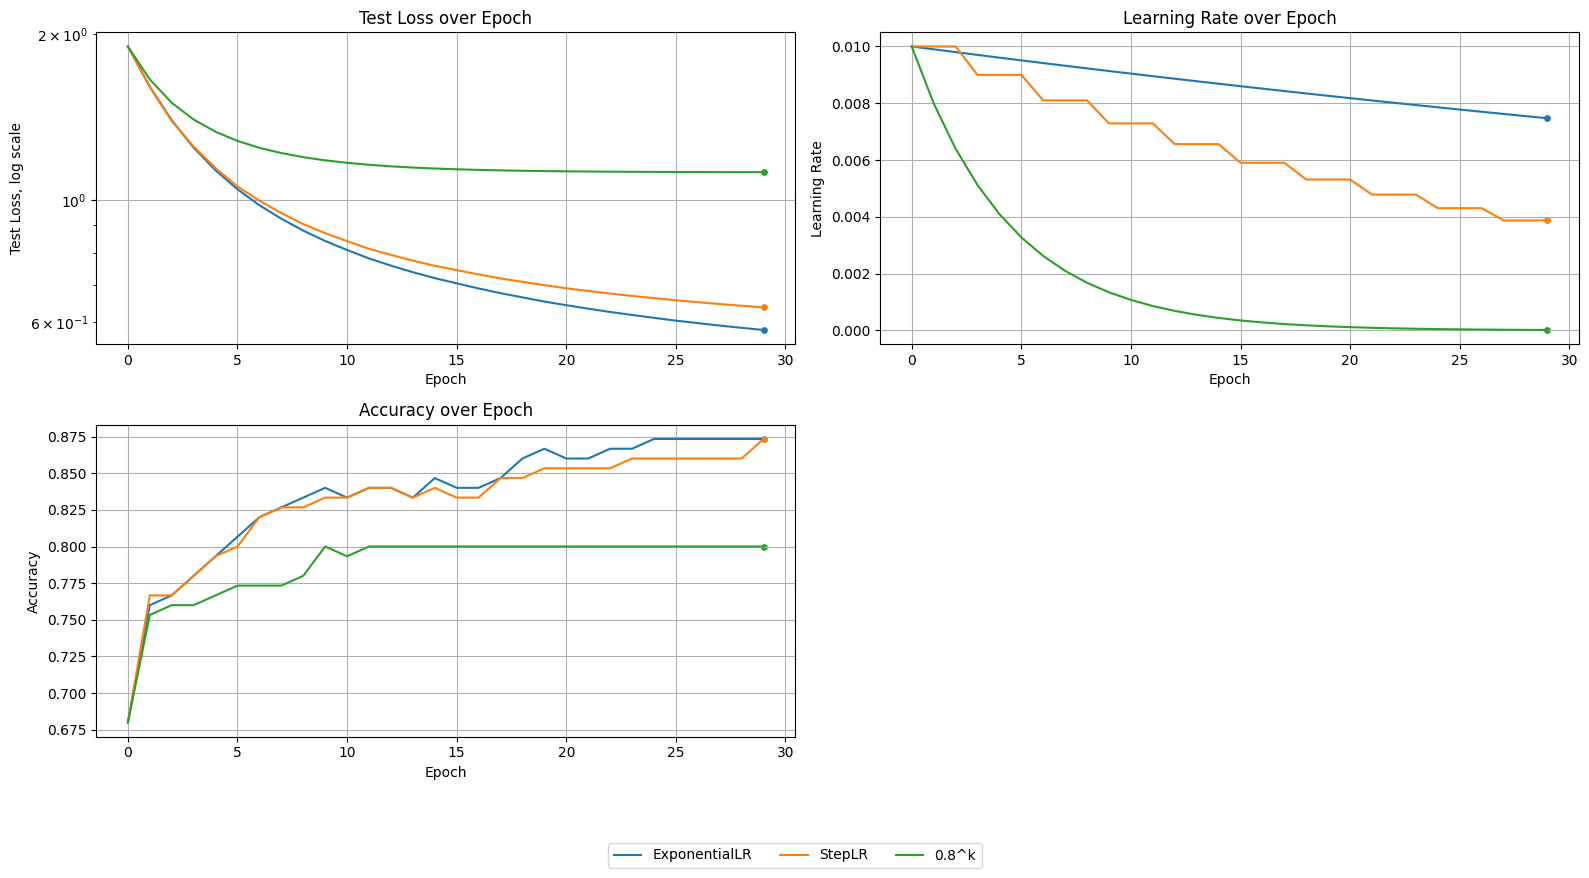

In [ ]:
scheds = check_schedulers_mnist(
    [
        ("ExponentialLR", partial(torch.optim.lr_scheduler.ExponentialLR, gamma=0.99)),
        ("StepLR", partial(torch.optim.lr_scheduler.StepLR, step_size=3, gamma=0.9)),
        ("0.8^k", partial(torch.optim.lr_scheduler.LambdaLR, lr_lambda=lambda epoch: 0.8 ** epoch)),
    ]
)
plot_lr_loss(scheds)

In [ ]:
# Проверка должна завершиться без ошибок
check_supremacy(scheds, baseline_data) # TODO

**Выводы**

- шаг $\frac{1}{(k + 1) ^ 2}$ легко побивается достаточно тривиальными схемами, так как он на глубине уменьшается очень медленно
- экспоненциальный шаг, степенной, а также попеременное возведение в степень бьет бэйзлайн, так как они ближе к оптимальным шагам с точки зрения теории
- лучше всего себя показали экспоненциальный и степенной шаг

# <a id='day4'></a> День 4 (12 + 19 баллов)

## Часть 1. Больше адаптивных методов (12 + 19 баллов)

### Задание 1 (8 баллов)

Обратимся к понятиям **L2-регуляризация** (L2 Regularization) и **затухание весов** (weight decay). Обе эти техники используются дле предотвращения переобучения, накладывая штраф на большие значения весов. Сначала рассмотрим эти техники на примере стандартного SGD.

Пускай $x$ - тренируемые веса модели, $\mathcal{L}_{error}$ - ошибка полученная из функции потерь, $\mathcal{L}$ - общая ошибка (total loss), которая используется для обновления весов, $\eta$ - шаг обучения, и $\lambda$ - гиперпараметр, определяющий силу штрафа. Тогда в случае знакомой L2-регуляризации, имеем

$$
\begin{align*}
& \mathcal{L} = \mathcal{L}_{error} + \lambda \|x\|^2 \\
& x = x - \eta \frac{\partial \mathcal{L}}{\partial x} - \eta \lambda x
\end{align*}
$$

При использовании затухания весов член $\eta \lambda x$ просто вычитается из текущих весов $x$. Другими словами

$$
\begin{align*}
& \mathcal{L} = \mathcal{L}_{error} \\
& x = x - \eta \frac{\partial \mathcal{L}}{\partial x} - \eta \lambda x
\end{align*}
$$

Кажется, результат один и тот же. Значит ли это, что L2-регуляризация == затухание весов? Нет! Давайте рассмотрим эти же техники, но уже для алгоритма SGD с моментумом.

L2-регуляризация:
$$
\begin{align*}
& \mathcal{L} = \mathcal{L}_{error} + \lambda \|x\|^2 \\
& h_k = \beta h_{k-1} + (1-\beta)(\frac{\partial \mathcal{L}}{\partial x} + \lambda x) \\
& x = x - \eta h_k = x - \eta \left( \beta h_{k-1} - (1-\beta)\frac{\partial \mathcal{L}}{\partial x} \right)
- \eta (1-\beta) \lambda x
\end{align*}
$$

Затухание весов:
$$
\begin{align*}
& \mathcal{L} = \mathcal{L}_{error} \\
& h_k = \beta h_{k-1} + (1-\beta)\frac{\partial \mathcal{L}}{\partial x}\\
& x = x - \eta h_k = x - \eta \left( \beta h_{k-1} - (1-\beta)\frac{\partial \mathcal{L}}{\partial x} \right)
- \eta \lambda x
\end{align*}
$$

Обратите внимание на последние члены в последних строках: в случае L2-регуляризации член затухания весов
$\eta \lambda x$ дополнительно умножается на $(1-\beta)$. Согласитесь, размер штрафа уже не такой интуитивный

Очевидно, всё становится ещё запутаннее, если взять метод посложнее - популярный Adam, например.

L2-регуляризация ([официальная реализация](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) Adam в PyTorch):
$$
\begin{align*}
& \mathcal{L} = \mathcal{L}_{error} + \lambda \|x\|^2 \\
& m_k = \frac{1}{1-\beta_1^k} \left( \beta_1 m_{k-1} + (1-\beta_1)(\frac{\partial \mathcal{L}}{\partial x} + \lambda x) \right)
 \\
& v_k =\frac{1}{1-\beta_2^k} \left( \beta_2 v_{k-1} + (1-\beta_2)(\frac{\partial \mathcal{L}}{\partial x} + \lambda x)^2 \right) \\
& x = x - \eta \frac{m_k}{\sqrt{v_k} + \epsilon}
\end{align*}
$$

Затухание весов:
$$
\begin{align*}
& \mathcal{L} = \mathcal{L}_{error} \\
& m_k = \frac{1}{1-\beta_1^k} \left( \beta_1 m_{k-1} + (1-\beta_1)\frac{\partial \mathcal{L}}{\partial x} \right)
 \\
& v_k =\frac{1}{1-\beta_2^k} \left( \beta_2 v_{k-1} + (1-\beta_2)(\frac{\partial \mathcal{L}}{\partial x})^2 \right) \\
& x = x - \eta \frac{m_k}{\sqrt{v_k} + \epsilon} - \eta \lambda x
\end{align*}
$$

В случае L2-регуляризации очень сложно выделить член, который отвечает за контроль весов - к нему примешивается слишком много других параметров. Однако в случае с затуханием весов всё предельно ясно

Однозначного ответа на вопрос "Что лучше - L2-регуляризация или затухание весов?" нет. Однако всё-таки иногда хочется более корректно контролировать штрафной член, а значит - необходимо модифицировать Adam

В этом задании вам нужно:
1. Дописать функцию `check_optimizers_mnist()`, которая в дальнейшем будет использоваться для тестирования алгоритмов на датасете MNIST
2. Реализовать метод Adam c затуханием весов, используя `torch.optim.Optimizer` (вспомните Семинар 10). Ниже приведён каркас класса с необходимыми гиперпараметрами и некоторыми полезными функциями
3. Проверить работоспособность метода с помощью функции `check_optimizers_mnist()`. Количество эпох оставьте равным 10
4. Построить сравнительные графики получившегося метода, SGD и Adam из библиотеки PyTorch с помощью функции `plot_optim_loss()`
5. Сделайте выводы

In [ ]:
plot_optim_loss = partial(
    draw_plots,
    plots=[
        ({"name": "Epoch"}, {"name": "Test Loss", "log": True}),
        (
            {"name": "Time", "axis_name": "Running time, seconds", "ref": "Time"},
            {"name": "Test Loss", "log": True},
        ),
        ({"name": "Epoch"}, {"name": "Accuracy"}),
        (
            {"name": "Time", "axis_name": "Running time, seconds", "ref": "Time"},
            {"name": "Accuracy"},
        ),
    ],
)

### Решение

In [ ]:
def check_optimizers_mnist(
    optimizers: list[
        tuple[str, Callable[[Iterator[nn.Parameter]], torch.optim.Optimizer]]
    ],
    epochs: int = 10,
) -> dict:
    results_dict = {}

    for name, optimizer_lambda in optimizers:
        test_losses = []
        accuracies = []
        time_logs = []



        torch.manual_seed(420)
        model = MnistModel().to(DEVICE)
        optimizer = optimizer_lambda(model.parameters())

        # initial eval
        loss, acc = eval_mnist(model)

        # log
        test_losses.append(loss)
        accuracies.append(acc)
        time_logs.append(0)

        torch.cuda.synchronize()
        start_time = time.time()

        with tqdm(range(epochs), desc=name) as loop:
            for _ in loop:
                # train
                # ОБЯЗАТЕЛЬНО сохраним граф вычислений, используя create_graph=True
                train_mnist(model, optimizer, create_graph=True) # TODO

                # eval
                loss, acc = eval_mnist(model)

                # log
                test_losses.append(loss)
                accuracies.append(acc)


                torch.cuda.synchronize()
                time_logs.append(time.time() - start_time)
                loop.set_postfix({"Loss": loss, "Accuracy": acc}) # TODO

        results_dict[name] = {
            "Epoch": list(range(epochs + 1)),
            "Time": time_logs,
            "Test Loss": test_losses,
            "Accuracy": accuracies,
        }

    return results_dict

AdamW: 100%|██████████| 10/10 [00:03<00:00,  2.72it/s, Loss=0.353, Accuracy=0.92]


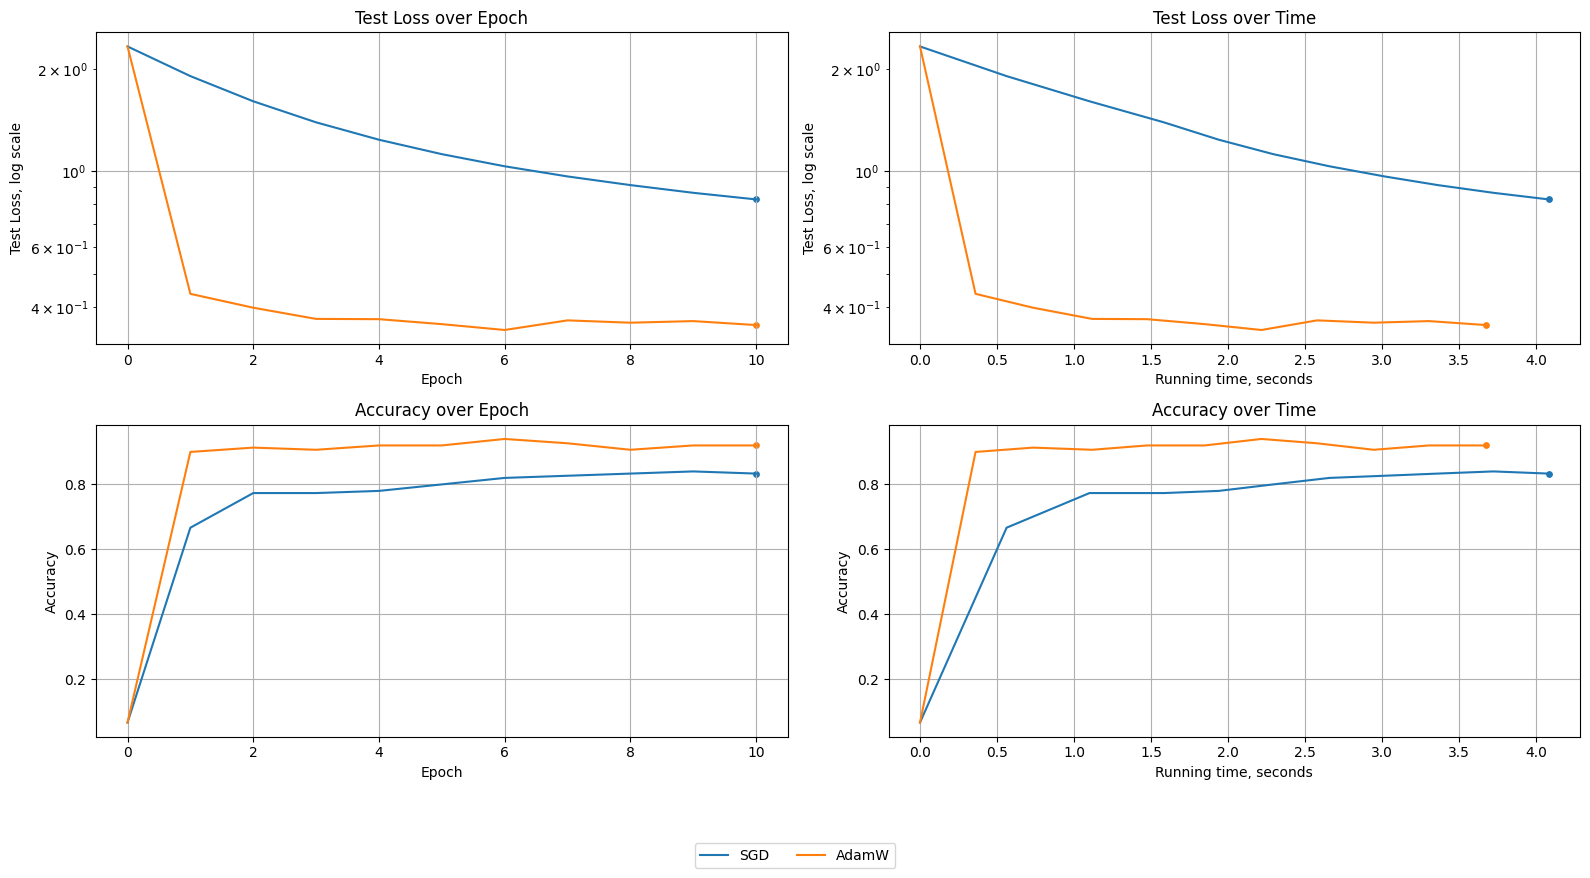

In [ ]:
opts = check_optimizers_mnist(
    [
        ("SGD", partial(torch.optim.SGD, lr=0.01)),
        ("AdamW", partial(torch.optim.AdamW, lr=0.01, betas=(0.9, 0.999), eps=1e-8, weight_decay=1e-2))
    ]
)
plot_optim_loss(opts)

Видим, что AdamW сработал гораздо лучше по качеству, это связано и с обрезанием весов, с учетом инерции, а также степени взятия градиента покомпонентно от каждого веса отдельно взависимости от прошедшей истории взятия градиентов.

### Задание 2* (7 баллов)

Большинство адаптивных (и не только) методов оптимизации могут быть записаны в виде

$$
x_{k+1} = x_k -\eta_k \hat{D}^{-1}_k m_k,
$$
где $\eta_k$ - шаг обучения, $\hat{D}_k$ - так называемая матрица предобусловленности, а $m_k$ - либо градиент (аппроксимация градиента), либо первый момент градиента с параметром импульса $\beta_1$, либо скорректированный по смещению первый момент градиента.
Простая интерпретация заключается в том, что вектор $m_k$ поворачивается и масштабируется на величину, обратную матрице предобусловленности $\hat{D}_k$. Полученное направление берётся как направление обновления.

Звучит немного сложновато, но все адаптивные методы, с которыми вы встречались до этого момента имеют такой вид (вспомните Семинар 10). Например, в случае AdaGrad мы имеем

$$
\begin{align*}
& m_k = g_k \\
& \hat{D}_k = \sqrt{\sum_{i=1}^k \text{diag} (g_k \odot g_k)}
\end{align*}
$$

Для RMSProp параметры принимают вид

$$
\begin{align*}
& m_k = g_k \\
& \hat{D}_k = \sqrt{\beta_2  \hat{D}^{2}_{k-1} + (1-\beta_2) \text{diag} (g_i \odot g_i)}
\end{align*}
$$

В алгоритме Adam модифицируется и $m_k$:

$$
\begin{align*}
& m_k = \frac{(1-\beta_1)\sum_{i=1}^k\beta_1^{k-i}g_i}{1-\beta_1^k} \\
& \hat{D}_k = \sqrt{\frac{(1-\beta_2)\sum_{i=1}^k\beta_2^{k-i}\text{diag} (g_i \odot g_i)}{1-\beta_2^k} }
\end{align*}
$$


Легко заметить, что для подсчёта $\hat{D}_k$ все вышеперечисленные методы используют $\text{diag} (g_k \odot g_k)$, то есть используют градиент (аппроксимацию) чтобы учитывать кривизну функции и потенциально ускорять сходимость. В следующих нескольких заданиях мы предлагаем вам пойти дальше и попробовать использовать информацию о производной второго порядка (гессиане) для оптимизации процесса обучения

Будем использовать метод Хатчинсона для аппроксимации следа гессиана $v_k$ функции:

$$
v_k = \text{diag} (z_k \odot H_k z_k),
$$
где $H_k$ - гессиан функции $f(x_k)$, а $z_k$ - случайный вектор с определенными статистическими свойствами. В методе Хатчинсона случайный вектор $z_k$ обычно берется из распределения с нулевым математическим ожиданием и единичной дисперсией, например, из распределения Радемахера, элементы которого принимают значения +1 или -1 с равной вероятностью (0.5). Более того, для лучшей точности мы можем применить этот метод несколько раз, скажем $n$. Тогда

$$
v_k = \frac{1}{n} \sum_{i=1}^n \text{diag} (z_i \odot H_k z_i).
$$

Заметьте, что в данном случае нас не интересует гессиан сам по себе, а только его произведение на вектор $z_k$. Это важный момент, так как нам не нужно строить непосредственно гессиан (что потребовало бы обращения матрицы, а это довольно затратная операция). К счастью, `torch.autograd.grad` позволяет эффективно вычислить $H_k z_k$ без вычисления гессиана


В этом задании вам нужно сделать следующее:
1. Дописать функцию `rademacher()`, которая генерирует случайные вектора из распределения Радемахера
2. Дописать функцию `hutchinson_approximation()`, которая реализует метод Хатчинсона

Для проверки реализаций используйте функции `check_hutchinson()` и `check_rademacher()`. Если проверки не проведены или провалены, **задание автоматически считается невыполненным**


In [ ]:
def check_hutchinson(hutchinson_approximation: Callable):
    a = torch.tensor([2.0, 3.0], requires_grad=True).to(DEVICE)
    b = torch.tensor([6.0, 4.0], requires_grad=True).to(DEVICE)
    q = 3 * a**3 - b**2

    params = [a, b]
    grads = torch.autograd.grad(q.sum(), [a, b], create_graph=True)

    res = hutchinson_approximation(
        params,
        grads,
        n_iterations=1,
        generator=torch.Generator(device=DEVICE).manual_seed(420),
    )
    res = [el for x in res for el in x.clone().detach().cpu().tolist()]
    assert np.allclose(res, [36.0, 54.0, -2.0, -2.0])

    grads = torch.autograd.grad(q.sum(), [a, b], create_graph=True)
    res = hutchinson_approximation(
        params,
        grads,
        n_iterations=5,
        generator=torch.Generator(device=DEVICE).manual_seed(420),
    )
    res = [el for x in res for el in x.clone().detach().cpu().tolist()]
    assert np.allclose(res, [7.2, 10.8, -0.4, -0.4])


def check_rademacher(rademacher: Callable):
    for i in range(1, 15):
        assert rademacher(i).shape == (i,)

### Решение

In [ ]:
def rademacher(
    shape, generator: Optional[torch.Generator] = None, device: torch.device = DEVICE
) -> torch.Tensor:
    """Распределение Радемахера

    Args:
        shape: требуемая размерность вектора
        generator: используется для воспроизводимости результатов

    Returns:
        torch.Tensor
    """
    ... # TODO


check_rademacher(rademacher)

Так как обычно в моделях больше одного тренируемого параметра, мы хотим получать аппроксимацию
для целого списка параметров, чему соответствует сигнатура нижеприведённой функции

Для эффективного подсчёта $H_k z_k$ используйте следующую конструкцию

```python
h_zs = torch.autograd.grad(
            grads,
            params,
            grad_outputs=zs,
            only_inputs=True,
            retain_graph=i < n_iterations - 1,
        )
```
где `zs` - список векторов из распределения Радемахера


In [ ]:
def hutchinson_approximation(
    params: list[torch.Tensor],
    grads: list[torch.Tensor],
    n_iterations: int = 1,
    generator=None,
) -> list[torch.Tensor]:
    """Аппроксимация по методу Хатчинсона

    Args:
        params: тренируемые параметры
        grads: градиенты тренируемых параметров
        n_iterations: количество применений метода
        generator: используется для воспроизводимости результатов (нужно передать в rademacher())

    Returns:
        list[torch.Tensor]: где i-й элемент является аппроксимацией для i-го параметра
    """

    ... # TODO


check_hutchinson(hutchinson_approximation)

### Задание 3* (9 баллов)



Теперь, когда все компоненты готовы, можно реализовать непосредственно метод. За основу возьмём идею Adam: метод будет иметь форму $x_{k+1} = x_k -\eta_k \hat{D}^{-1}_k m_k$, где

$$
\begin{align*}
& m_k = \frac{(1-\beta_1)\sum_{i=1}^k\beta_1^{k-i}g_i}{1-\beta_1^k} \\
& \hat{D}_k = \sqrt{\frac{(1-\beta_2)\sum_{i=1}^k\beta_2^{k-i}v_i^2}{1-\beta_2^k} }
\end{align*}
$$

В этом задании вам нужно:
1. Реализовать описанный выше метод с помощью `torch.optim.Optimizer` (вспомните Семинар 10). Ниже приведён каркас класса с необходимыми гиперпараметрами и некоторыми полезными функциями
2. Проверить работоспособность метода с помощью функции `check_optimizers_mnist()`. Количество эпох оставьте равным 10
3. Построить необходимые графики с помощью приведённой ниже функции `plot_optim_loss()`



### Решение

In [ ]:
# это просто шаблон - можете переименовать его или удалить
class Template1(torch.optim.Optimizer):
    def __init__(
        self,
        params,
        lr=1e-3,
        betas=(0.9, 0.999),
        eps=1e-8,
        n_samples: int = 1,
    ):
        super(Template1, self).__init__(
            params,
            defaults={
                "lr": lr,
                "betas": betas,
                "eps": eps,
            },
        )

        self.n_samples = n_samples

        # генератор для воспроизводимости (для метода Хатчинсона)
        self.generator = torch.Generator(device=DEVICE).manual_seed(420)

        ...  # TODO

    def get_params(self):
        return [
            p for group in self.param_groups for p in group["params"] if p.requires_grad
        ]

    @torch.no_grad()
    def zero_and_set_hessians(self):
        # Занулим Гессианы
        for p in self.get_params():
            hess = self.state[p]["hess"]
            if not isinstance(hess, float):
                hess.zero_()

        params = [p for p in self.get_params() if p.grad is not None]
        if len(params) == 0:
            return

        grads = [p.grad for p in params]

        # Считаем Гессианы
        ...  # TODO

    @torch.no_grad()
    def step(self):
        self.zero_and_set_hessians()

        ...  # TODO

In [ ]:
# ваше решение (code)

### Задание 4 (4 балла)

Пришло время попробовать реализованные методы на чём-то более сложном, чем MNIST

В этом задании вам нужно:
1. Дописать функцию `check_optimizers_cifar()`, которая в дальнейшем будет использоваться для тестирования алгоритмов на датасете CIFAR-10. Используйте функции `train_cifar()` и `eval_cifar()`
2. Протестировать методы, реализованные в этой части, с разными гиперпараметрами (для каждого **минимум 3 вариации**). Обязательно
    - Для метода из задания 1 попробовать разные weight_decay
    - **Если делали задание 3**, для метода из задания 3 попробовать разное количество итераций метода Хатчинсона
    - **Если не делали задание 3**, возьмите на выбор один из следующих методов из стандартной библиотеки PyTorch: AdaGrad, RMSProp, SGD с nesterov=True
При тестировании зафиксировать `model_class=CifarNet` и `epochs=20`
3. Построить необходимые графики для каждого метода с помощью функции `plot_optim_loss()`
4. Построить один общий график, где показать методы с лучшими гиперпараметрами, с помощью функции `plot_optim_loss()`. Объяснить, по каким критериям выбирались "лучшие" гиперпараметры
5. Сделать выводы

### Решение

In [ ]:
def check_optimizers_cifar(
    optimizers: list[
        tuple[str, Callable[[Iterator[nn.Parameter]], torch.optim.Optimizer]]
    ],
    epochs: int = 20,
    model_class: Callable[[], nn.Module] = CifarNet,
) -> dict:
    results_dict = {}

    for name, optimizer_lambda in optimizers:
        test_losses = []
        accuracies = []
        time_logs = []

        torch.manual_seed(420)
        model = model_class().to(DEVICE)
        optimizer = optimizer_lambda(model.parameters())

        # initial eval
        loss, acc = eval_cifar(model)

        # log
        test_losses.append(loss)
        accuracies.append(acc)
        time_logs.append(0)

        torch.cuda.synchronize()
        start_time = time.time()

        with tqdm(range(epochs), desc=name) as loop:
            for _ in loop:
                # train
                # ОБЯЗАТЕЛЬНО сохраним граф вычислений, используя create_graph=True
                train_cifar(model, optimizer, create_graph=True) # TODO

                # eval
                loss, acc = eval_cifar(model)

                # log
                test_losses.append(loss)
                accuracies.append(acc)

                torch.cuda.synchronize()
                time_logs.append(time.time() - start_time)
                loop.set_postfix({"Loss": loss, "Accuracy": acc}) # TODO


        results_dict[name] = {
            "Epoch": list(range(epochs + 1)),
            "Time": time_logs,
            "Test Loss": test_losses,
            "Accuracy": accuracies,
        }

    return results_dict

AdamW, weight_decay = 0.001: 100%|██████████| 20/20 [00:05<00:00,  3.36it/s, Loss=0.636, Accuracy=0.868]


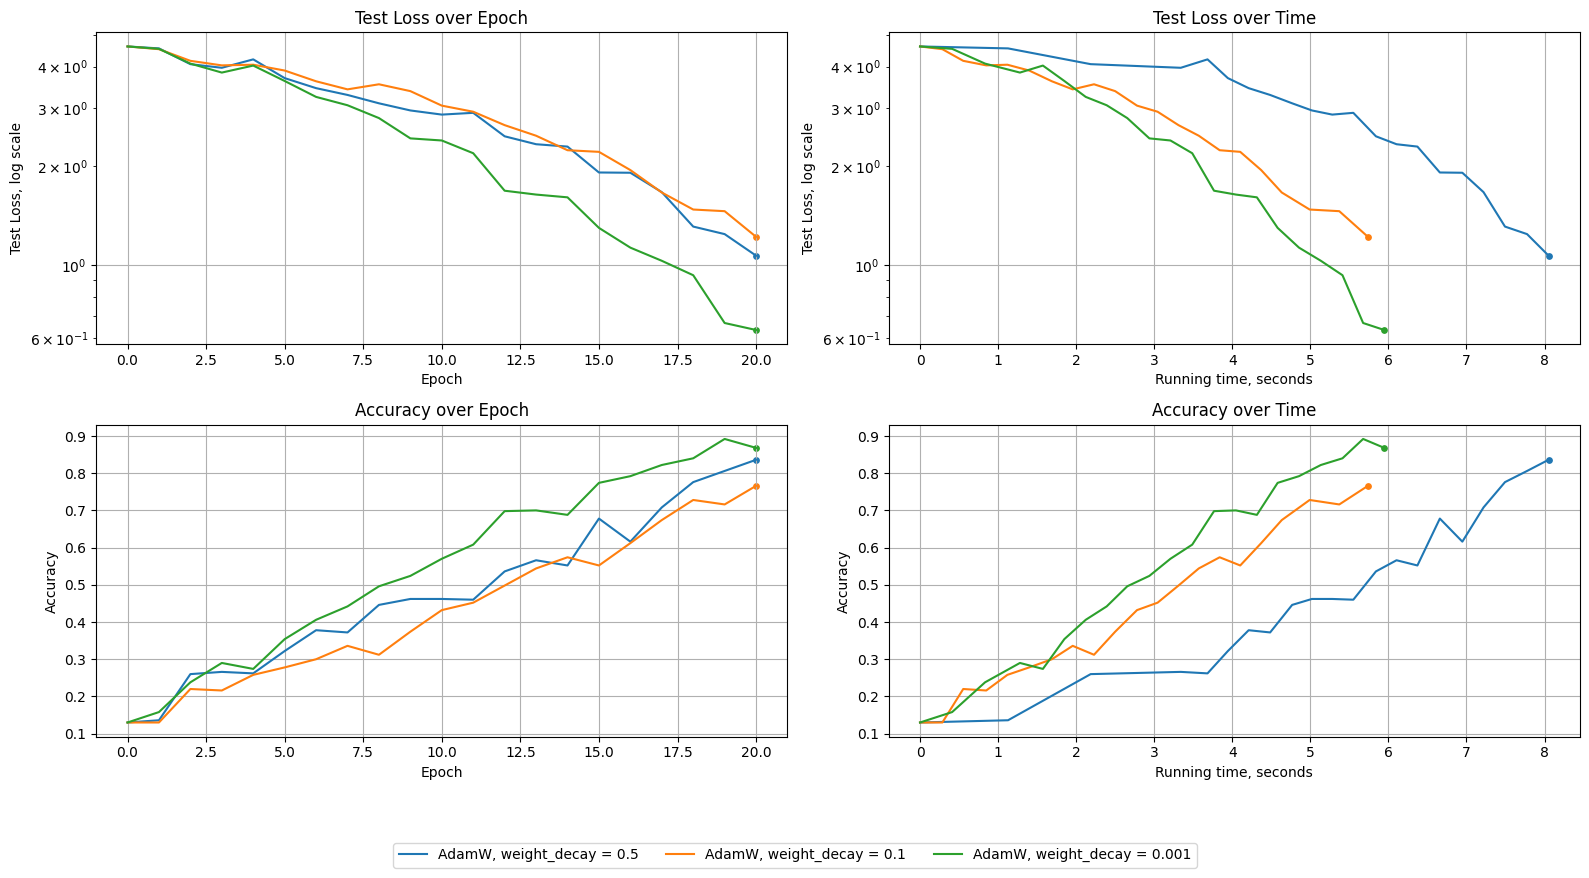

In [ ]:
cifs_adamW = check_optimizers_cifar(
    [
        ("AdamW, weight_decay = 0.5", partial(torch.optim.AdamW, lr=0.01, weight_decay=0.5)),
        ("AdamW, weight_decay = 0.1", partial(torch.optim.AdamW, lr=0.01, weight_decay=0.1)),
        ("AdamW, weight_decay = 0.001", partial(torch.optim.AdamW, lr=0.01, weight_decay=0.001))
    ]
)
plot_optim_loss(cifs_adamW)

RMSprop, lr=0.001, alpha=0.85, momentum=0.3: 100%|██████████| 20/20 [00:10<00:00,  1.87it/s, Loss=2.29, Accuracy=0.582]


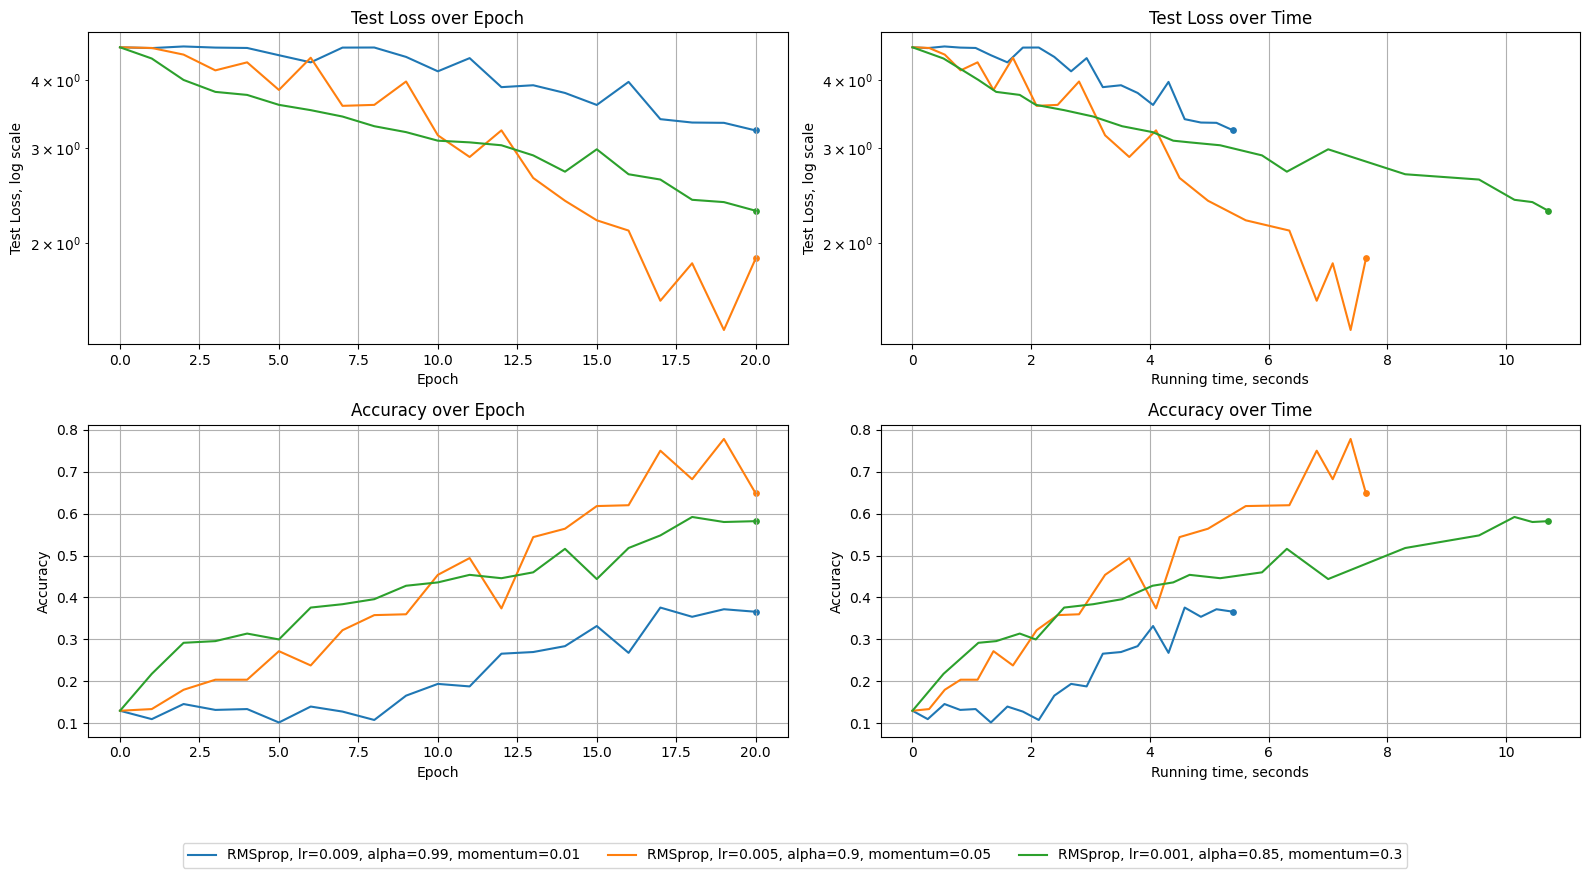

In [ ]:
cifs_rms = check_optimizers_cifar(
    [
        ("RMSprop, lr=0.009, alpha=0.99, momentum=0.01", partial(torch.optim.RMSprop, lr=0.009, alpha=0.99, momentum=0.01)),
        ("RMSprop, lr=0.005, alpha=0.9, momentum=0.05", partial(torch.optim.RMSprop, lr=0.005, alpha=0.9, momentum=0.05)),
        ("RMSprop, lr=0.001, alpha=0.85, momentum=0.3", partial(torch.optim.RMSprop, lr=0.001, alpha=0.85, momentum=0.3))
    ]
)
plot_optim_loss(cifs_rms)

RMSprop, lr=0.005, alpha=0.9, momentum=0.05: 100%|██████████| 20/20 [00:05<00:00,  3.66it/s, Loss=1.14, Accuracy=0.8]


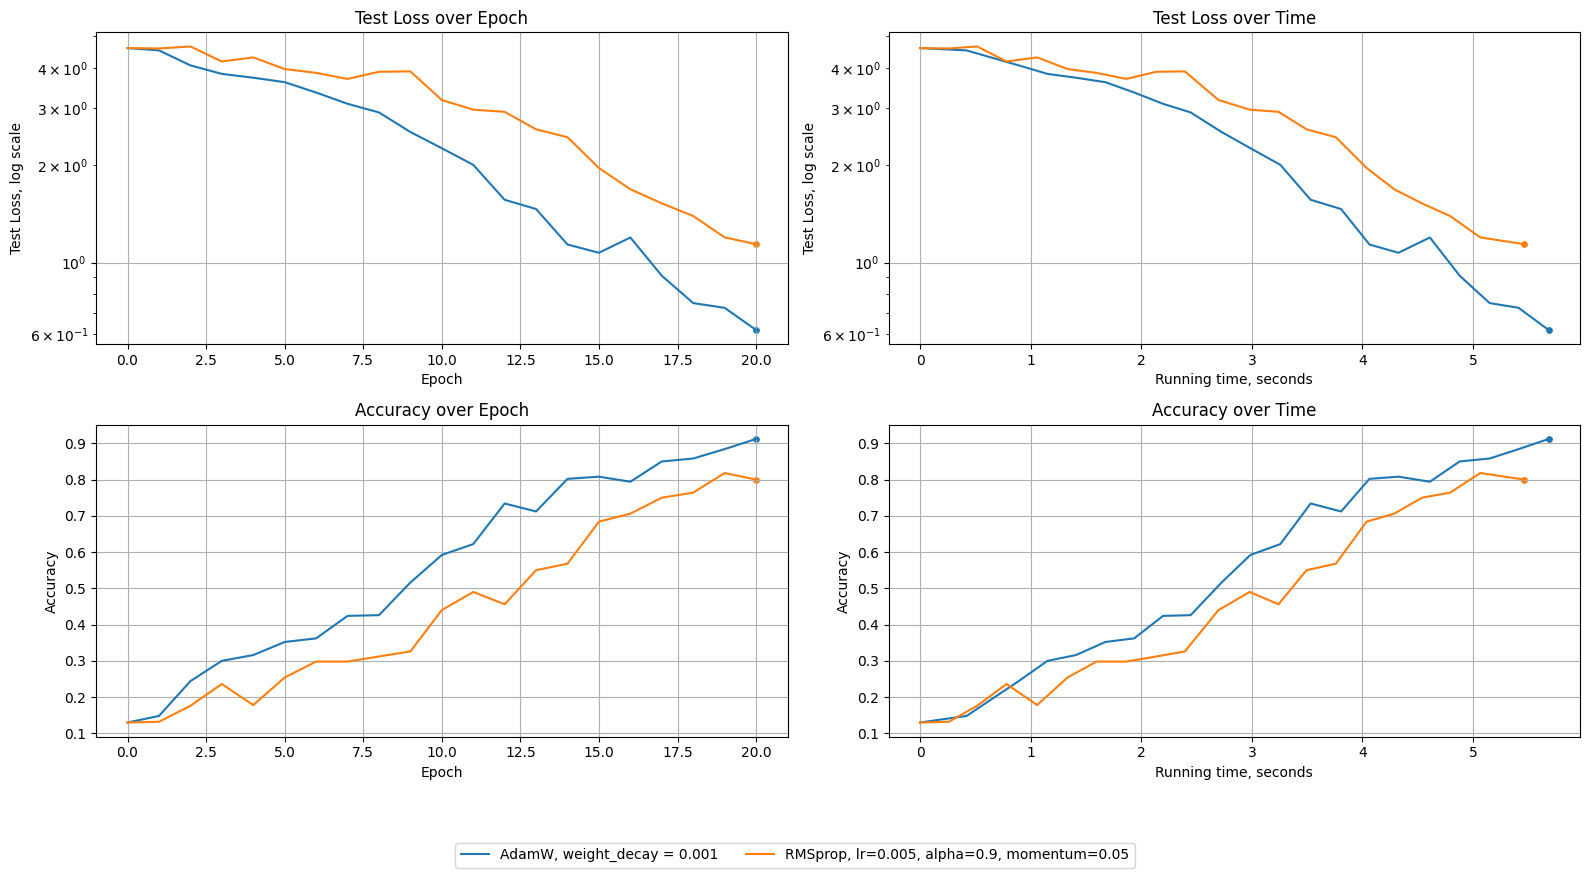

In [ ]:
the_best = check_optimizers_cifar(
    [
        ("AdamW, weight_decay = 0.001", partial(torch.optim.AdamW, lr=0.01, weight_decay=0.001)),
        ("RMSprop, lr=0.005, alpha=0.9, momentum=0.05", partial(torch.optim.RMSprop, lr=0.005, alpha=0.9, momentum=0.05)),
    ]
)
plot_optim_loss(the_best)

Лучшие гиперпараметры выбирались согласно скорости сходимости к оптимуму, а также по лучшей accuracy. Внимание уделялось и крайним параметрам, из-за которых алгоритм расходился и имел относительно других очень низкий показатель.
**Выводы**
- adamW показал себя лучше, так как учитывает все тонкости оптимизации: инерцию, историю градиентов, а также степень влияния новых градиентов
- RMSprop похуже, так как он предшественник AdamW, и не имеет эффективных тонкостей, которые есть у adamW

### Задание 5* (3 балла)

В этом задании вам нужно:
1. Провести те же тесты, что и в предыдущем задании, только теперь зафиксировать `model_class=ResNet` и `epochs=6`
2. Сделать выводы, в том числе принимая во внимание результаты предыдущего задания

### Решение

In [ ]:
# ваше решение (code + markdown)

# <a id='day5'></a> День 5 (6 + 17 баллов). CVXPY

## Часть 1. Разминочная задачка (6 баллов)

### Задание 1 (6 баллов)
Дана некая матрица $B = x_1A_1 + x_2A_2 + ... + x_n A_n$. То есть, матрица $B$ - линейная комбинация матриц $A_i$. В этом задании мы попробуем решить задачу поиска коэффициентов $x_i$ используя библиотеку CVXPY. \
Пусть $A,B \in R^{\,p \times q}, n = 6, p = 10, q = 30$\
Вам нужно:
1. Сформулировать задачу как задачу минимизации
3. Решить сгенерированную нами задачу используя библиотеку CVXPY, вывести и проверить ответ
4. Добавить ограничение: $||x||_2 \leq 3$. Решить ту же задачу, что раньше, но с новым ограничением. Вывести и проверить ответ

### Решение

In [ ]:
np.random.seed(322432)
p, q, n = 10, 30, 6
A, B = np.random.randn(n, p, q), np.random.randn(p, q)

x = cp.Variable(n)
f = cp.norm(B - sum(A[i] * x[i] for i in range(n)), 'fro')
  # указываем ограничения
prob1 = cp.Problem(cp.Minimize(f))
prob1.solve()

print("Оптимальное значение целевой функции:", prob1.value)
print("Решения прямой задачи:")
_ = print(x.value)

Оптимальное значение целевой функции: 17.53691812067851
Решения прямой задачи:
[ 0.0329799   0.05468817 -0.01518518  0.11388129  0.00495587  0.02639932]


In [ ]:


x = cp.Variable(n)
f = cp.norm(B - sum(A[i] * x[i] for i in range(n)), 'fro')

constraints = [cp.norm2(x) <= 3]  # указываем ограничения
prob2 = cp.Problem(cp.Minimize(f), constraints)
prob2.solve()

print("Оптимальное значение целевой функции:", prob2.value)

print("Решения прямой и двойственной задач:")
_ = print(x.value), print(constraints[0].dual_value)


Оптимальное значение целевой функции: 17.53691812067853
Решения прямой и двойственной задач:
[ 0.03297994  0.05468819 -0.0151852   0.11388131  0.00495586  0.02639932]
2.6994843125856126e-09


In [ ]:
prob2.value > prob1.value

True

С ограничением ошибка выше

## Часть 2*. Релаксация (17 баллов)

 Рассмотрим задачу максимального разреза графа. Дан связный ненаправленный граф с $N$ вершинами. Между некоторыми вершинами имеется ребро заданного веса $w_{ij}$. __Задача__: распределить вершины на две группы так, чтобы максимизировать сумму весов всех ребер, которые соединяют вершины в разных группах (одна вершина в группе А, другая вершина в группе Б)

Эта задача имеет довольно большое число различных применений на практике. \
Один из очень простых игрушечных примеров для понимания сути: предположим есть набор компьютеров. Некоторые из них имеют друг с другом связь (по проводу или беспроводу), другие нет. \
У нас есть две разные задачи, под которые мы хотим распределить компьютеры (и работающих за ними людей). Задачи связаны, так что обе группы компьютеров должны иметь связь друг с другом. Всякое бывает, и связь между 2 (а может и больше) компьютерами (любыми) может пропасть. \
Наша задача разделить компьютеры на эти группы так, чтобы минимизировать риски от пропажи связи между случайными компьютерами. \
Как решение, мы можем присвоить вес 1 всем ребрам, и решить задачу максимального разреза графа. Так как вес всех ребер равен 1, то задача переформулируется так: разделить компьютеры на 2 группы так, чтобы максимизировать число ребер (ведь сумма весов равна сумме ребер в нашем случае) между компьютерами в разных группах. Как раз то, что нам нужно. Интуитивно ясно, что чем больше соединений между группами, тем меньше шанс остаться без связи между группами

На рисунке можно посмотреть пример максимального разреза, когда у каждого ребра вес 1. То есть, мы максимизируем суммарное число ребер из вершин одного набора в вершины другого набора


Будем работать с графом $G = (V, E)$, где $V$ - множество вершин, $E$ - множество ребер. $N$ - число вершин.\
 $w_{ij}$ - вес ребра $(i,j) \in E$. 0, если ребра нет\
 $S, \hat{S}$ - непересекающиеся множества вершин в первой и второй группах.\
 $x_i  = \left\{ \begin{array}{cl} 1 & : \ x_i \in S \\-1 & : \ x_i \in \hat{S}\end{array} \right.$\
 То есть $x_i$ показывает, в какой из двух групп находится вершина. Эту переменную (вектор) мы и хотим найти

Наша задача может быть записана как задача целочисленного квадратичного программирования:
$$
\begin{align*}
& \max_x \frac{1}{2} \sum_{i}^{N} \sum_{j}^{N} w_{ij} \frac{(1-x_i x_j)}{2} \\
& \text{s.t. } x_i \in \{1, -1\}, \forall i \in V
\end{align*}
$$


$\frac{(1-x_i x_j)}{2}$ равно единице только когда обе вершины находятся в разных группах, в противном случае 0. Поэтому мы максимизируем как раз сумму весов тех ребер, что соединяют вершины из разных групп. Деление на два происходит из-за того, что каждое ребро считается два раза.

Основная проблема заключается в том, что без модификаций это NP-трудная задача, для которой не известен алгоритм решения за полиномиальное время. Для их решения, обычно проводится релаксация (изменение) условия таким образом, что бы получилась новая NP-полная задача (для которой известен алгоритм решения за полиномиальное время), решение которой близко к настоящему решению

Конкретнее, предположим что $c_{optimal}$ - это значение целевой функции при решении изначальной задачи любым алгоритмом. Назовем некий алгоритм $\delta$-приблизительным, если он выдает оптимальное значение целевой функции $c_{approximate} \ge \delta c_{optimal}$. Чем ближе $\delta$ к 1, тем лучше. К примеру, алгоритм, который случайно делит вершины графа на две группы, является 0.5-приблизительным. Мы же выведем 0.875-приблизительный алгоритм.

Для этого, мы сведем оригинальную задачу целочисленного квадратичного программирования к такой задаче, которую мы знаем как решать (удостоверившись, что решение этой задачи не даст решение оптимальнее, чем настоящее, что логично), путем релаксации.

Мы сделаем релаксацию к задаче полуопределенного программирования, которая в общем виде задается следующим образом:
$$
\begin{align*}
& \min_X \langle C, X \rangle \\
& \text{s.t. } \langle A_i, X \rangle \le b_i, \forall i \in V \\
& X \succeq 0
\end{align*}
$$

где $\langle A, B \rangle = \sum_{i,j}^{N} A_{ij} B_{ij}$\
Вместо неравенства в условиях может быть и равенство. Эту задачу можно написать по-разному, мы же будем использовать эту форму

Идейно, если в задаче линейного программирования мы оптимизируем линейную функцию на выпуклом многограннике, то в задаче полуопределенного программирования мы оптимизируем так же линейную функцию на выпуклой фигуре, но теперь это более общая фигура, а не многогранник. Ниже можно посмотреть на пример. Заметим, что задача полуопределенного программирования - это задача линейного программирования с бесконечным числом линейных ограничений (ведь область выпуклая, поэтому можем любую кривую на границе приблизить прямыми).

### Задание 1 (2 балла)

Сейчас у нас в условии некая квадратичная функция от $x$, которую нам нужно свести к линейной функции. Уйдем от чисел $x_i$ (равных по модулю единице) к единичным векторам $u_i \in \mathbb{R}^N$.

Интуиция следующая: до этого мы скаляром отмечали, к какому набору принадлежит вершина. Теперь, мы это делаем единичным вектором. И ставим задачу максимизировать расстояние между конечными точками эти векторов, если точки лежат в разных наборах. Если же вершины в одном наборе, тогда их вектора должна указывать в примерно одно место

Запишите исходную задачу с новыми условиями и переменными. Распишите, откуда взялись те или иные новые условия

### Решение

In [ ]:
# ваше решение (markdown)

### Задание 2 (4 балла)
Теперь, сделаем из квадратичной функции линейную. Введите $Y_{i,j} = u_i ^\top u_j$, перепишите задачу из предыдущего пункта с новыми условиями.\
Сделайте так, чтобы условия (не целевая функция) выглядели уже как в шаблоне для задачи полуопределенного программирования. \
Распишите, откуда взялись те или иные новые условия

### Решение

In [ ]:
# ваше решение (markdown)

### Задание 3 (3 балла)
Осталось целевую функцию представить в виде внутреннего произведения матриц, как в шаблоне. Распишите вашу целевую функцию в виде ... + ..., и подумайте как эту сумму превратить во внутреннее произведение матриц.

Подсказка: внутреннее произведение $\sum_{i,j}^{N} A_{ij} B_{ij} $ суммирует поэлементное произведение двух матриц. Это можно сделать сначала по диагонали, потом по оставшимся элементам, а потом сложить. К подобной сумме вам и стоит попробовать привести исходную сумму

### Решение

In [ ]:
# ваше решение (markdown)

### Задание 4 (4 балла)
Ниже вам задана матрица весов $W$. Вам нужно решить для $Y$ задачу, сформулированную вами выше в подзадача 2 или 3, используя CVXPY. Вы можете формулировать задачу в коде как вам удобно (упрощать матричные умножения, и так далее), __объяснив все изменения__. Вы должны пройти ассерт в конце

In [ ]:
W = np.array(
    [
        [0, 4, 10, -3, 0, 0, 0],
        [4, 0, 0, 0, 6, 0, 0],
        [10, 0, 0, 7, 0, 0, 0],
        [-3, 0, 7, 0, 0, 0, 8],
        [0, 6, 0, 0, 0, 4, 0],
        [0, 0, 0, 0, 4, 0, 1],
        [0, 0, 0, 8, 0, 1, 0],
    ],
    dtype=np.float32,
)
num_of_nodes = 7

### Решение

In [ ]:
Y = ...
constraints = []

cost = ...
problem = ...
optimal_value = problem.solve()

In [ ]:
assert abs(optimal_value - 39) < 1e-2, "Правильно решение - 39, ваше же ему не равно"

In [ ]:
# ваше решение (code)

### Задание 5 (1 балл)
Мы получили решение для $Y$. Однако, нужно то нам узнать значения $x_i$. Начнем идти в обратном порядке. Используя наше определение матрицы $Y$, запишите $Y$ как произведение двух матриц, предложите способ из __только__ матрицы $Y$ получить эти 2 матрицы. Напишите соответствующий код.

### Решение

In [ ]:
# ваше решение (code + markdown)

### Задание 6 (3 балла)
Одна из полученных вами матриц является матрицей, у которой строка $i$ равна $u_i$ - единичному вектору, который олицетворяет принадлежность точку тому или иному набору. Нам нужно этот вектор превратить в циферку - 1 или -1. Наша модель обучена так, что вершины из разных наборов имеют "разные" векторные репрезентации, которые находятся в разных частях единичной сферы. Мы воспользуемся следующим приемом (называется __randomized hyperplane rounding__): сгенерируем __случайную__ плоскость (разберитесь, как правильно это делать) и поделим точки на единичной сфере на 2 набора в зависимости от того, по какую сторону эти точки оказались относительно сгенерированной плоскости. Мы полагаем, что если две точки находятся в разных частях сферы, то скорее всего при создании случайной плоскости через центр сферы эти точки окажутся по разные стороны.

Вам нужно найти способ сгенерировать случайную гиперплоскость и разделить вершины на два набора. У вас должны получится два списка __чисел__: S и S_bar. В обоих - номера вершин в этих наборах, нумерация с нуля.\
Вы должны пройти ассерт в конце

### Решение

In [ ]:
S = []
S_bar = []

In [ ]:
# ваше решение (code)

In [ ]:
# Проверка деления
def calculate_cut(S, S_bar, W):
    max_cut = 0
    for i in S:
        for j in S_bar:
            max_cut += W[i][j]
    return max_cut


assert (
    abs(calculate_cut(S, S_bar, W) - 39) < 1e-2
), "Правильное решение - 39, ваша разбивка этот ответ не дает"